<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1

MINE-4101: Applied Data Science  
Univerisdad de los Andes

Integrantes:

*  Lina Ojeda - 202112324 - l.ojedaa@uniandes.edu.co
*  William Toro - 201112526 - wy.toro993@uniandes.edu.co


  
**Dataset:** Hotel bookings [[dataset](https://drive.google.com/file/d/1VA3XyONx5mFEzx1YN_ZsPAkEMWXuRBqI/view?usp=sharing) | [dictionary](https://docs.google.com/spreadsheets/d/1p-lHMlXSUAYdP19odh3AqqkowHRWfWSHWXCURqMOmCc/edit?usp=sharing)].


Última actuaización: Septiembre, 2025

# 0. Importaciones y carga de datos

## 0.1 Importaciones

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




## 0.2 Carga de datos

In [ ]:
# Configuración de Pandas para ampliar el número de columnas y filas que se muestran

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [ ]:
# Carga de archivos csv desde repositorio git hub
hotel_file_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_bookings_modified.csv'
hotel_dict_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_dictionary.csv'

hotel_df = pd.read_csv(hotel_file_url, low_memory=False)
hotel_dict = pd.read_csv(hotel_dict_url, sep=',', header=0)

Una vez cargados ambos archivos visualizamos sus tipos dtypes y las estadisticas basicas describe() de las variables. Para las variables numéricas entrega medidas como el conteo de valores no nulos, la media, la desviación estándar, el mínimo, los cuartiles y el valor máximo, lo que permite entender rápidamente la distribución y dispersión de los datos. En el caso de las variables categóricas, el resultado incluye el número de valores no nulos, la cantidad de categorías distintas, la categoría más frecuente y su frecuencia, facilitando así una primera exploración tanto de datos numéricos como de texto.

In [ ]:
hotel_df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,58895.000000,58895.000000,58307.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,58891.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,49763.000000,58894.000000,58894.000000,58306.000000,58894.000000,201.000000
mean,0.411393,100.050904,2205.522939,27.837389,15.766432,1.058154,2.847576,1.969148,0.112937,0.136599,0.030189,0.069191,0.099618,0.243009,146.983080,3.525979,96.250426,0.096697,0.512225,34.417910
std,0.492090,101.162420,1837.392466,13.346053,8.783036,1.093032,2.235486,2.943454,0.419710,3.115889,0.171109,1.102138,0.829166,0.695205,120.114987,21.841676,58.555599,0.300382,0.768378,38.571032
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,-1.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000,-1.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,84.000000,0.000000,0.000000,-1.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.000000,0.000000,1.000000,65.000000
max,1.000000,737.000000,20016.000000,53.000000,31.000000,19.000000,50.000000,100.000000,10.000000,100.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,100.000000


In [ ]:
hotel_dict.dtypes

,0
Field,object
Type,object
Description,object


In [ ]:
hotel_dict.describe()

,Field,Type,Description
count,32,32,32
unique,32,5,32
top,hotel,integer,Hotel (H1 = Resort Hotel or H2 = City Hotel)
freq,1,17,1


Con el comando .dtypes identificamos que algunas variables no tenían el formato adecuado (números como texto, fechas como cadenas, etc.). Para corregir esto, se implementa la siguiente función que, apoyada en el diccionario de datos, convierte automáticamente cada columna al tipo correcto en pandas (Int64, float, string, etc. Así el dataset queda estandarizado y listo para el análisis sin errores posteriores.

In [ ]:
# Crear diccionario de tipos
varType = dict(zip(hotel_dict['Field'], hotel_dict['Type']))

# Función para convertir tipos
def Type_convert(var_type):
    if var_type == 'integer':
        return 'Int64'
    elif var_type == 'numeric':
        return 'float'
    elif var_type == 'text':
        return 'string'
    elif var_type == 'boolean':
        return 'boolean'
    elif var_type == 'date':
        return 'datetime64[ns]'
    else:
        return None  # tipo desconocido

In [ ]:
# Aplicar conversión de tipos
for col, tipo in varType.items():
    tipo_convertido = Type_convert(tipo)
    if tipo_convertido == 'datetime64[ns]':
        hotel_df[col] = pd.to_datetime(hotel_df[col], errors='coerce')
    elif tipo_convertido == 'Int64':
        hotel_df[col] = pd.to_numeric(hotel_df[col], errors='coerce').astype('Int64')
    elif tipo_convertido:
        hotel_df[col] = hotel_df[col].astype(tipo_convertido)



In [ ]:
# Se muestra las dimensiones del dataframe
hotel_df.shape

(58895, 33)

In [ ]:
# Se muestra el tipo de las columnas luego de la transformación
hotel_df.dtypes

,0
hotel,string[python]
is_canceled,boolean
lead_time,Int64
arrival_date_year,Int64
arrival_date_month,string[python]
arrival_date_week_number,Int64
arrival_date_day_of_month,Int64
stays_in_weekend_nights,Int64
stays_in_week_nights,Int64
adults,Int64


In [ ]:
hotel_df.sample(10) # Se visualiza una muestra de 10 elementos

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
44527,City Hotel,False,97,2015,October,41,7,0,2,1,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,D,0,No Deposit,1,<NA>,0,Transient-Party,0.00,0,0,Check-Out,2015-10-09,NaN
45272,City Hotel,False,69,2015,October,44,25,2,1,1,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,E,1,No Deposit,37,<NA>,58,Transient-Party,75.33,0,0,Check-Out,2015-10-28,NaN
46068,City Hotel,True,198,2015,December,49,5,2,1,2,0,0,HB,ESP,Groups,TA/TO,False,0,0,A,A,0,Non Refund,1,<NA>,0,Transient,90.00,0,0,Canceled,2015-10-23,NaN
39171,Resort Hotel,False,15,2017,August,32,7,1,2,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,A,I,0,No Deposit,240,<NA>,0,Transient,231.67,0,2,Check-Out,2017-08-10,NaN
16952,Resort Hotel,False,101,2015,September,37,12,2,5,2,0,0,BB,GBR,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,26,<NA>,0,Contract,73.15,0,1,Check-Out,2015-09-19,NaN
44022,City Hotel,True,68,2015,September,40,29,0,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,20,<NA>,0,Transient-Party,48.00,0,0,Canceled,2015-09-11,NaN
32010,Resort Hotel,False,4,2017,January,2,14,0,1,1,0,0,HB,PRT,Groups,TA/TO,False,0,0,A,A,0,No Deposit,168,<NA>,0,Transient-Party,68.00,0,0,Check-Out,2017-01-15,NaN
39501,Resort Hotel,False,176,2017,August,33,18,0,2,2,2,0,HB,USA,Direct,Direct,False,0,0,G,G,0,No Deposit,250,<NA>,0,Transient,279.00,0,1,Check-Out,2017-08-20,NaN
55280,City Hotel,True,213,2016,August,33,9,2,8,2,0,0,BB,ROU,Direct,Direct,False,0,0,A,A,0,No Deposit,14,<NA>,0,Transient,80.75,0,1,Canceled,2016-02-04,NaN
44668,City Hotel,False,66,2015,October,41,9,1,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,21,<NA>,0,Transient-Party,75.00,0,0,Check-Out,2015-10-12,NaN


# 1. Análisis univariado

La siguiente funcion permite generar un resumen detallado de cualquier variable del dataset. Para cada columna muestra información básica como el tipo de dato, la cantidad total de registros, el número y porcentaje de valores faltantes y la cantidad de valores únicos. Si la variable es numérica, presenta estadísticas descriptivas como media, desviación estándar, cuartiles, además de medidas de forma como asimetría (skewness) y curtosis. Si la variable es categórica o tiene pocos valores distintos, despliega su distribución de frecuencias absolutas y porcentuales. De esta manera, la función facilita un diagnóstico rápido y completo del comportamiento de cada atributo de manera individual.

In [ ]:
def univariate_summary(df, column):
    """Generate comprehensive univariate summary for a column"""
    print(f"\n{'='*50}")
    print(f"UNIVARIATE ANALYSIS: {column}")
    print(f"{'='*50}")

    # Basic info
    print(f"Data type: {df[column].dtype}")
    print(f"Total values: {len(df[column])}")
    print(f"Missing values: {df[column].isnull().sum()} ({df[column].isnull().mean()*100:.2f}%)")
    print(f"Unique values: {df[column].nunique()}")

    if df[column].dtype in ['Int64', 'float']:
        # Numerical analysis
        print(f"\n--- Numerical Statistics ---")
        print(df[column].describe())
        print(f"Skewness: {df[column].skew():.3f}")
        print(f"Kurtosis: {df[column].kurtosis():.3f}")

    elif df[column].dtype == 'object' or df[column].nunique() < 15:
        # Categorical analysis
        print(f"\n--- Frequency Distribution ---")
        print(df[column].value_counts())
        print(f"\n--- Percentage Distribution ---")
        print(df[column].value_counts(normalize=True) * 100)

# Example usage
univariate_summary(hotel_df, 'hotel')
univariate_summary(hotel_df, 'customer_type')
univariate_summary(hotel_df, 'distribution_channel')
univariate_summary(hotel_df, 'assigned_room_type')
univariate_summary(hotel_df, 'arrival_date_month')
univariate_summary(hotel_df, 'is_canceled')



UNIVARIATE ANALYSIS: hotel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 2

--- Frequency Distribution ---
hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: Int64

--- Percentage Distribution ---
hotel
Resort Hotel    68.02445
City Hotel      31.97555
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: customer_type
Data type: string
Total values: 58895
Missing values: 589 (1.00%)
Unique values: 4

--- Frequency Distribution ---
customer_type
Transient          42430
Transient-Party    13078
Contract            2486
Group                312
Name: count, dtype: Int64

--- Percentage Distribution ---
customer_type
Transient          72.771241
Transient-Party    22.429939
Contract            4.263712
Group               0.535108
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: distribution_channel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 5

--- Frequency Distribution ---
distribution_chann

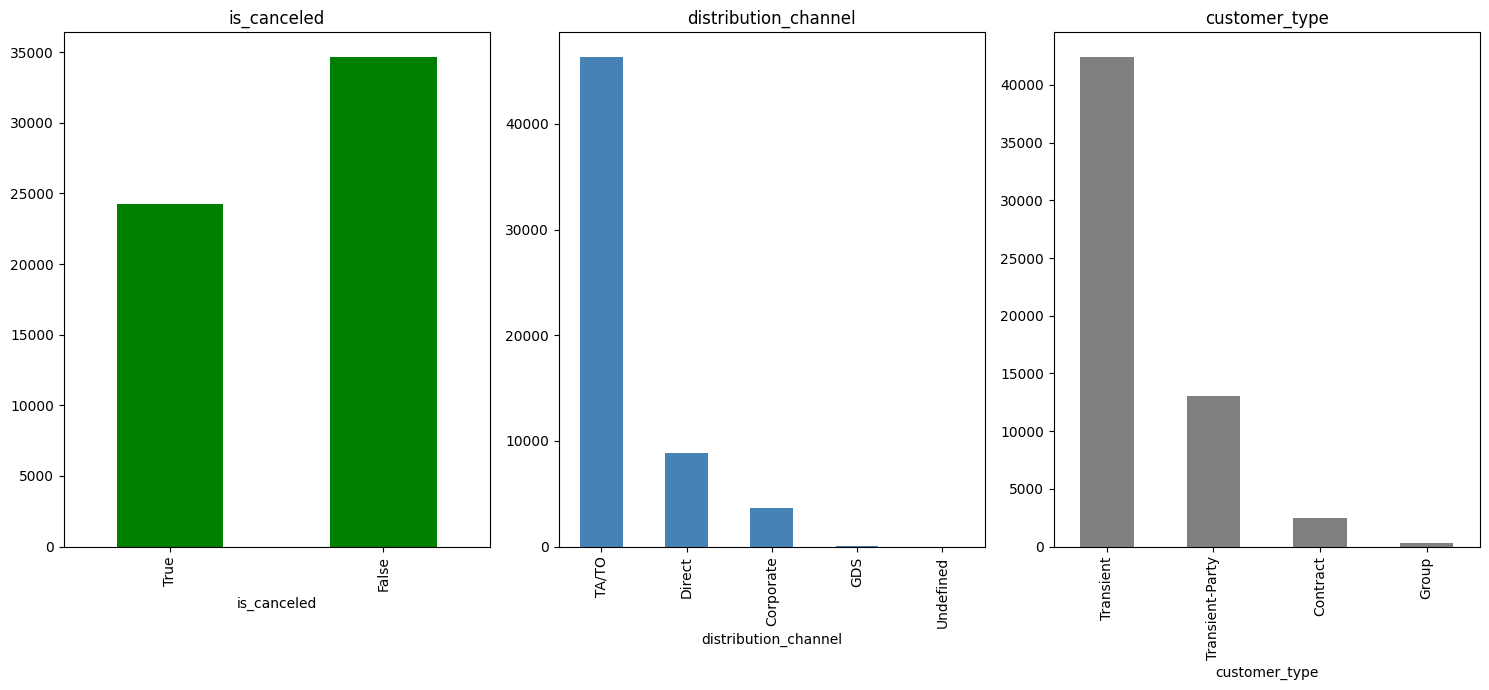

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axes = axes.flatten()
hotel_df["is_canceled"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=axes[0], color="green")
hotel_df["distribution_channel"].value_counts().plot(kind="bar", ax=axes[1], color="steelblue")
hotel_df["customer_type"].value_counts().plot(kind="bar", ax=axes[2], color="grey")
axes[0].set_title("is_canceled")
axes[1].set_title("distribution_channel")
axes[2].set_title("customer_type")
plt.tight_layout()
plt.show()


Las gráficas de barras presentan una visión general de tres variables clave. En primer lugar, se observa que aproximadamente un 40% de las reservas fueron canceladas, reflejando la relevancia de este problema para la gestión hotelera. En cuanto a los canales de distribución, las agencias de viaje en línea (TA/TO) dominan ampliamente el mercado, seguidas a gran distancia por las reservas directas y corporativas, mientras que GDS y Undefined son casi insignificantes. Finalmente, el tipo de cliente más frecuente es el Transient, con una mayoría clara sobre los segmentos Transient-Party, Contract y Group, lo cual indica que el grueso de las reservas proviene de clientes individuales y de corta estancia.  




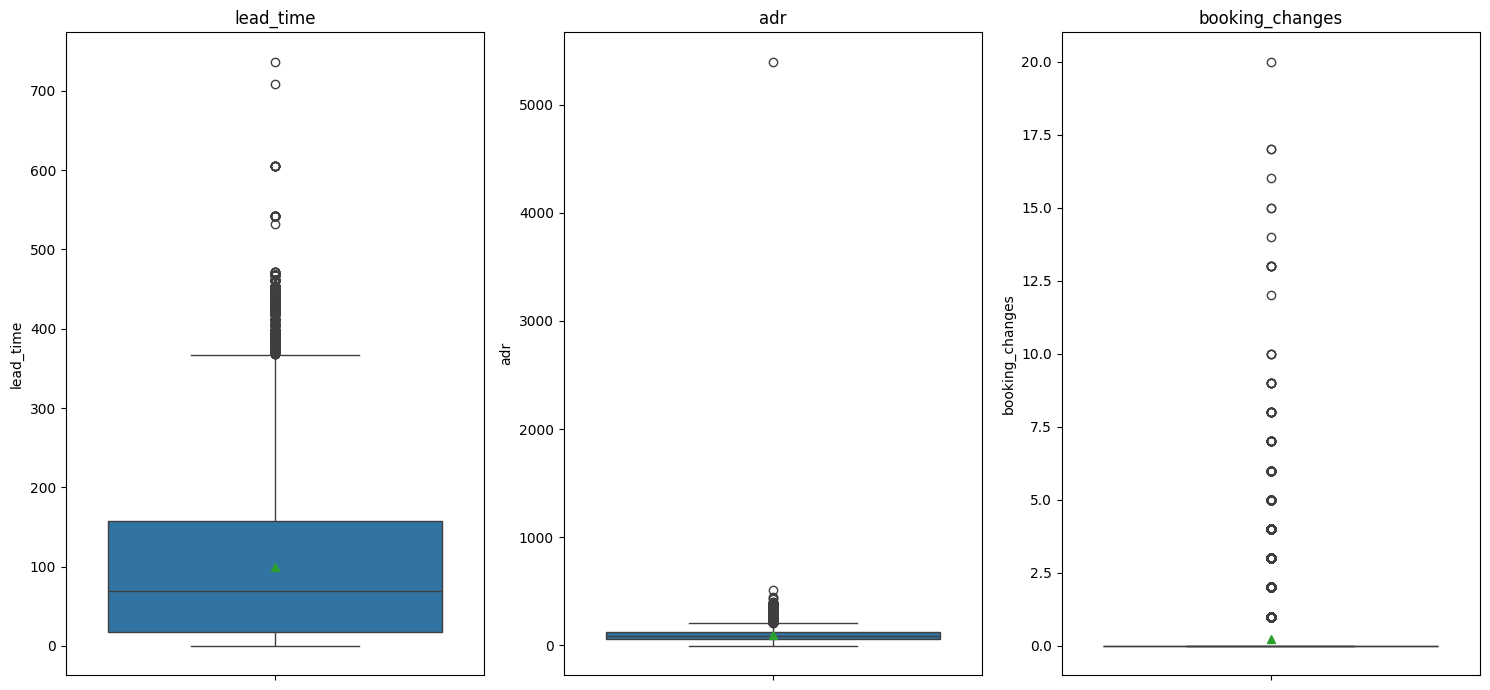

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes = axes.flatten()

sns.boxplot(y=hotel_df["lead_time"], ax=axes[0], showmeans=True)
axes[0].set_title("lead_time")
sns.boxplot(y=hotel_df["adr"], ax=axes[1], showmeans=True)
axes[1].set_title("adr")
sns.boxplot(y=hotel_df["booking_changes"], ax=axes[2], showmeans=True)
axes[2].set_title("booking_changes")


plt.tight_layout()
plt.show()

Los boxplots permiten observar que la mayoría de las reservas se concentran en valores bajos, aunque aparecen outliers que representan situaciones excepcionales. En el caso de **lead_time**, la mayoría de reservas se realizan con poca anticipación, pero existen casos aislados de reservas hechas con cientos de días de adelanto. Para **adr**, la mayor parte de las tarifas diarias promedio están en un rango bajo, aunque se identifican valores atípicos extremadamente altos que podrían sesgar el análisis si no se controlan. Finalmente, en **booking_changes** se confirma que la mayoría de las reservas no presentan modificaciones, pero algunos registros muestran hasta 20 cambios, lo que refleja casos poco frecuentes que podrían responder a clientes con planes inestables o a errores en el sistema de registro.  


# 2. Estrategia de Análisis

Para abordar los objetivos planteados y responder a las preguntas de negocio, se propone un enfoque de análisis dividido en tres niveles complementarios. En una primera fase se realizará un análisis descriptivo, en el que se calcularán estadísticas básicas como promedios, medianas, proporciones y frecuencias, con el fin de caracterizar la ocupación y las cancelaciones en ambos tipos de hotel. Además, se tendrán en cuenta medidas de dispersión y posición como los cuartiles, lo que permitirá identificar cómo se distribuyen los valores y detectar posibles asimetrías o comportamientos atípicos. Estas observaciones iniciales se apoyarán en representaciones gráficas como histogramas, gráficos de barras y boxplots.En una segunda fase se llevará a cabo un análisis multivariado que permitirá explorar la relación entre distintas variables de interés. Este nivel busca descubrir patrones más complejos, por ejemplo, diferencias en los niveles de ocupación entre hoteles resort y hoteles de ciudad, la influencia del canal de distribución en la probabilidad de cancelación, o la relación entre el tiempo de anticipación de la reserva, la tarifa promedio diaria y la duración de la estadía. Para este propósito se emplearán visualizaciones comparativas como boxplots segmentados por categorías, gráficos de barras apiladas, mapas de calor de correlación entre otros.

Finalmente, en una tercera fase se aplicarán pruebas de hipótesis con el fin de validar los hallazgos encontrados en las etapas anteriores. Estas pruebas permitirán confirmar si las diferencias observadas en variables como lead time, ADR o tasas de cancelación entre grupos (por ejemplo, reservas canceladas frente a no canceladas, o distintos canales de distribución) son estadísticamente significativas. Entre las pruebas a utilizar se encuentran el t-test de Welch para comparaciones de medias y la prueba Chi-cuadrado de independencia para evaluar asociaciones entre variables categóricas.
Con esta metodología integral se busca no solo describir las características principales del conjunto de datos, sino también analizar las relaciones más relevantes y proporcionar evidencia estadística que respalde conclusiones y recomendaciones prácticas para la gestión estratégica de la cadena hotelera.

# 3. Desarrollo de la estrategía


## 3.0 Visualizacion general del DataFrame


In [ ]:
h_df= hotel_df.copy()
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           58895 non-null  string        
 1   is_canceled                     58895 non-null  boolean       
 2   lead_time                       58895 non-null  Int64         
 3   arrival_date_year               58307 non-null  Int64         
 4   arrival_date_month              58895 non-null  string        
 5   arrival_date_week_number        58895 non-null  Int64         
 6   arrival_date_day_of_month       58895 non-null  Int64         
 7   stays_in_weekend_nights         58895 non-null  Int64         
 8   stays_in_week_nights            58895 non-null  Int64         
 9   adults                          58895 non-null  Int64         
 10  children                        58891 non-null  Int64         
 11  ba

Al revisar la estructura del dataset con **df.info()**, se observa que la base cuenta con 58.895 registros y 33 columnas en total. En general, los tipos de datos están bien asignados. Sin embargo, en el caso de **arrival_date_month**, el valor aparece como texto, lo cual implica que en visualizaciones los meses se ordenen alfabéticamente en lugar de seguir el orden cronológico. Por esta razón, más adelante se tomará la decisión de convertir esta columna en una variable de tipo **Categorical** con un orden explícito de los 12 meses de enero a diciembre, de manera que los análisis de estacionalidad se interpreten correctamente.  

En cuanto a los registros duplicados, no se calcularán ni se aplicará una limpieza en este aspecto. Dado que este dataset corresponde a reservas de hotel, es posible que existan múltiples registros idénticos en varios atributos, lo cual no necesariamente implica un error, sino situaciones reales de negocio (por ejemplo, varias reservas iguales a través de un mismo canal).

## 3.1 Nulos


In [ ]:
null_cols = h_df.columns[hotel_df.isna().any()]
h_df[null_cols].isna().sum()

,0
arrival_date_year,588
children,4
country,478
agent,9132
company,55417
days_in_waiting_list,1
customer_type,589
adr,1
required_car_parking_spaces,589
total_of_special_requests,1


Al revisar la base de datos se observa que varias columnas presentan un porcentaje muy bajo de valores faltantes en relación con el tamaño total del dataset, como children, days_in_waiting_list, adr, total_of_special_requests, reservation_status_date, reservation_status, customer_type, required_car_parking_spaces, arrival_date_year y country. Dado que estos casos representan menos del 1% de los registros, más adelante se optará por eliminar directamente esas filas para evitar imputaciones que podrían introducir ruido.

También se identifican columnas con un número más alto de valores nulos. En particular, agent tiene alrededor del 15% y company cerca del 85%. Estos vacíos no corresponden a errores, sino a la realidad de que muchas reservas no utilizan un agente o no están asociadas a una empresa. Por este motivo, más adelante se evaluará si conviene reemplazar los nulos por categorías explícitas o si es preferible mantenerlos como valores faltantes (NA) con la interpretación de que reflejan precisamente esa ausencia.


Finalmente, la columna kids muestra una gran cantidad de valores nulos y, además, es redundante, ya que puede calcularse directamente a partir de children y babies. En este caso, se tomará la decisión de eliminarla y cuando sea necesario recalcularla con base en las otras dos variables.

In [ ]:
print("¿Agentes únicos que incluyen 0?:", (h_df['agent'] == 0).any())
print("¿Hay company con valor 0?:", (h_df['company'] == 0).any())

¿Agentes únicos que incluyen 0?: False
¿Hay company con valor 0?: False


Al revisar las variables agent y company se consideró la posibilidad de reemplazar los valores nulos por 0, de manera que este valor representara explícitamente los casos en los que la reserva no tiene agente o no está asociada a una compañía. Sin embargo, al analizar la variable agent se identificó que existe un agente con identificador igual a 0, lo que generaría confusión si se utilizara este mismo valor para representar la ausencia de agente. Por esta razón, en agent se decidió mantener los valores nulos como están, interpretándolos como “sin agente”. En contraste, en la variable company no existe conflicto con el valor 0, por lo que los registros nulos se reemplazaran en el item 3.2 con este valor, de modo que 0 pasa a representar las reservas sin compañía.

## 3.2 Limpieza

In [ ]:
if 'kids' in h_df.columns:
    h_df = h_df.drop(columns=['kids'])

cols_dropna = [
    'arrival_date_year','children','days_in_waiting_list','adr',
    'total_of_special_requests','reservation_status_date',
    'reservation_status','customer_type','required_car_parking_spaces','country'
]
cols_dropna = [c for c in cols_dropna if c in h_df.columns]

before = len(h_df)
h_df = h_df.dropna(subset=cols_dropna)
print("Filas eliminadas por nulos en variables críticas:", before - len(h_df))

if 'company' in h_df.columns:
    n_before = h_df['company'].isna().sum()
    h_df['company'] = h_df['company'].fillna(0).astype('Int64')
    print("Nulos rellenados en company:", n_before)

if 'arrival_date_month' in h_df.columns:
    orden_meses = [
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ]
    h_df['arrival_date_month'] = pd.Categorical(
        h_df['arrival_date_month'],
        categories=orden_meses, ordered=True
    )



Filas eliminadas por nulos en variables críticas: 2780
Nulos rellenados en company: 52949


In [ ]:
print("Shape original:", hotel_df.shape, "| Shape limpio:", h_df.shape)
h_df.isna().mean().sort_values(ascending=False).head(10)

Shape original: (58895, 33) | Shape limpio: (56115, 32)


,0
agent,0.150245
hotel,0.000000
lead_time,0.000000
is_canceled,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
arrival_date_year,0.000000
stays_in_week_nights,0.000000
adults,0.000000


In [ ]:
h_df['arrival_date_month'].dtype

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True, categories_dtype=object)

En este paso se eliminaron filas con valores faltantes en variables críticas con baja proporción de nulos, tales como **arrival_date_year**, **children**, **days_in_waiting_list**, **adr**, **total_of_special_requests**, **reservation_status_date**, **reservation_status**, **customer_type**, **required_car_parking_spaces** y **country**. Dado que los nulos en estas columnas representan menos del 1% del total de registros, la decisión fue eliminarlos directamente para no distorsionar el análisis posterior.  

Asimismo, se eliminó la columna redundante **kids**, la cual podrá calcularse en cualquier momento a partir de **children + babies**.  

En el caso de la variable **company**, donde la mayoría de los valores eran nulos, se reemplazaron por el valor **0**, manteniendo el campo como entero (**Int64**) y documentando que *0* representa "sin compañia"

Finalmente, la columna **arrival_date_month**
 fue transformada en un tipo categórico ordenado de enero a diciembre, para asegurar que los análisis de estacionalidad reflejen la secuencia cronológica de los meses y no un orden alfabético.

In [ ]:
cols_no_neg = [
    'lead_time','stays_in_weekend_nights','stays_in_week_nights',
    'adults','children','babies','adr',
    'previous_cancellations','previous_bookings_not_canceled',
    'booking_changes','days_in_waiting_list',
    'required_car_parking_spaces','total_of_special_requests','company','agent'
]

cols_no_neg = [c for c in cols_no_neg if c in h_df.columns]

# Crear un reporte de cuántos registros tienen valores negativos
neg_report = {}
for col in cols_no_neg:
    neg_count = (h_df[col] < 0).sum()
    if neg_count > 0:
        neg_report[col] = neg_count

print("Columnas con valores negativos detectados:")
print(neg_report if neg_report else "No se encontraron valores negativos")



Columnas con valores negativos detectados:
{'adults': np.int64(90), 'babies': np.int64(87), 'adr': np.int64(1)}


En primer lugar, se definió un conjunto de variables numéricas en las que no tendría sentido encontrar valores negativos. Para estas columnas se generó un reporte que contabiliza cuántos registros presentan valores menores a cero. Este chequeo permite identificar posibles errores de registro o datos inconsistentes en el dataset.

El resultado mostró que existían valores negativos en tres columnas clave. Dado que no es lógico tener huéspedes negativos ni tarifas negativas, se decidió eliminar directamente estas filas del dataset.


In [ ]:
cols_with_neg = ['adults', 'babies', 'adr']

before = len(h_df)
h_df = h_df[(h_df[cols_with_neg] >= 0).all(axis=1)]
after = len(h_df)

print("Filas eliminadas por valores negativos:", before - after)
print("Shape final del dataset:", h_df.shape)

Filas eliminadas por valores negativos: 178
Shape final del dataset: (55937, 32)


En el segundo bloque de código se aplicó un filtro que conserva únicamente los registros en los que estas variables (**adults**, **babies** y **adr**) son mayores o iguales a cero. Con ello se eliminaron en total 178 filas, dejando el dataset con 55.937 registros y 32 columnas. Esta limpieza garantiza que los análisis posteriores se realicen sobre datos coherentes y sin valores imposibles.

In [ ]:
bin_cols = ['is_canceled', 'is_repeated_guest']

print("### Revisión de variables binarias ###")
for col in bin_cols:
    if col in h_df.columns:
        print(f"\n--- {col} ---")
        print("Valores únicos encontrados:", h_df[col].unique())
        print(h_df[col].value_counts(dropna=False))

        # Detectar inválidos
        invalid_mask = ~h_df[col].isin([0,1]) & h_df[col].notna()
        invalid_count = invalid_mask.sum()

        if invalid_count > 0:
            print(f" {invalid_count} registros inválidos en {col} -> reemplazados por NaN.")
            h_df.loc[invalid_mask, col] = pd.NA
        else:
            print(" Todos los valores están en {0,1}.")


### Revisión de variables binarias ###

--- is_canceled ---
Valores únicos encontrados: <BooleanArray>
[False, True]
Length: 2, dtype: boolean
is_canceled
False    32786
True     23151
Name: count, dtype: Int64
 Todos los valores están en {0,1}.

--- is_repeated_guest ---
Valores únicos encontrados: <BooleanArray>
[False, True]
Length: 2, dtype: boolean
is_repeated_guest
False    54242
True      1695
Name: count, dtype: Int64
 Todos los valores están en {0,1}.


In [ ]:
cat_cols = ['arrival_date_month','deposit_type','customer_type','distribution_channel']

print("\nRevisión de variables categóricas")
for col in cat_cols:
    if col in h_df.columns:
        print(f"\n--- {col} ---")
        print("Valores únicos encontrados:", h_df[col].unique())
        print(h_df[col].value_counts(dropna=False).head(10))  # top 10 categorías
        print("Total categorías distintas:", h_df[col].nunique())

        # Para arrival_date_month verificar que no haya meses fuera del catálogo
        if col == 'arrival_date_month':
            valid_months = [
                "January","February","March","April","May","June",
                "July","August","September","October","November","December"
            ]
            invalid = h_df[~h_df[col].isin(valid_months)]
            print("Meses fuera de catálogo:", len(invalid))




Revisión de variables categóricas

--- arrival_date_month ---
Valores únicos encontrados: ['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']
arrival_date_month
August       7359
September    6405
July         5873
October      5741
May          5025
April        4938
June         4515
March        4246
February     3624
December     2916
Name: count, dtype: int64
Total categorías distintas: 12
Meses fuera de catálogo: 0

--- deposit_type ---
Valores únicos encontrados: <StringArray>
['No Deposit', 'Refundable', 'Non Refund', 'No Refund']
Length: 4, dtype: string
deposit_type
No Deposit    49665
Non Refund     5213
No Refund       922
Refundable      137
Name: count, dtype: Int64
Total categorías distintas: 4

--- customer_type ---
Valores únicos encontrados: <StringArray>
[

In [ ]:
if 'deposit_type' in h_df.columns:
    print("\nAntes de corrección en deposit_type:")
    print(h_df['deposit_type'].value_counts())

    h_df['deposit_type'] = h_df['deposit_type'].replace({'No Refund': 'Non Refund'})

    print("\nDespués de corrección en deposit_type:")
    print(h_df['deposit_type'].value_counts())

if 'distribution_channel' in h_df.columns:
    print("\nAntes de corrección en distribution_channel:")
    print(h_df['distribution_channel'].value_counts())

    h_df = h_df[h_df['distribution_channel'] != 'Undefined']
    print("\nDespués de corrección en distribution_channel:")
    print(h_df['distribution_channel'].value_counts())


Antes de corrección en deposit_type:
deposit_type
No Deposit    49665
Non Refund     5213
No Refund       922
Refundable      137
Name: count, dtype: Int64

Después de corrección en deposit_type:
deposit_type
No Deposit    49665
Non Refund     6135
Refundable      137
Name: count, dtype: Int64

Antes de corrección en distribution_channel:
distribution_channel
TA/TO        44287
Direct        8313
Corporate     3325
GDS             11
Undefined        1
Name: count, dtype: Int64

Después de corrección en distribution_channel:
distribution_channel
TA/TO        44287
Direct        8313
Corporate     3325
GDS             11
Name: count, dtype: Int64


En **deposit_type** se identificó una duplicación de categorías por diferencias de escritura: **No Refund** y **Non Refund**. Estas se unificaron bajo la etiqueta **Non Refund** para mantener consistencia.  

En **distribution_channel** apareció la categoría **Undefined** con un único registro, lo cual no aporta al análisis. Se optó por eliminar esa fila para trabajar únicamente con categorías válidas.



  Boxplots para detección de outliers


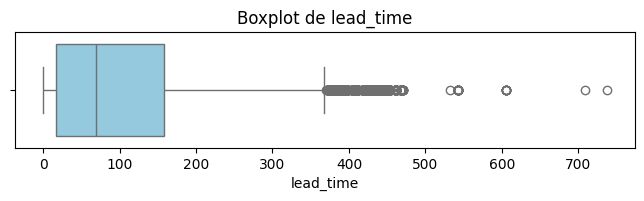

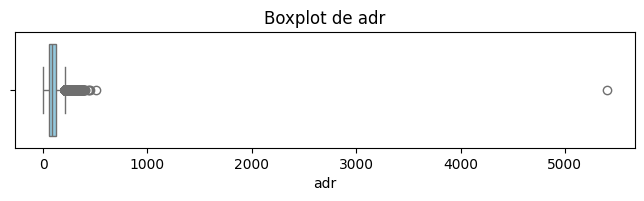

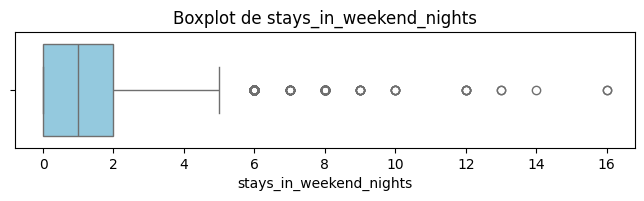

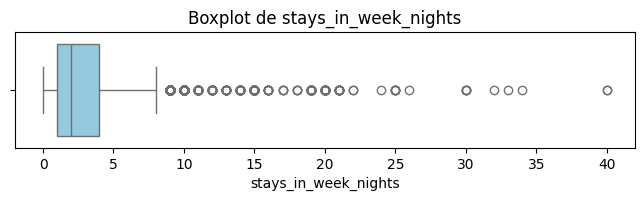

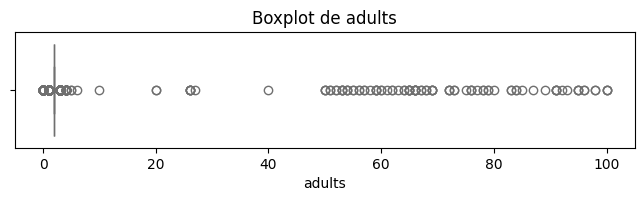

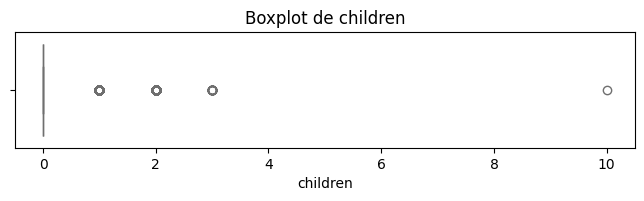

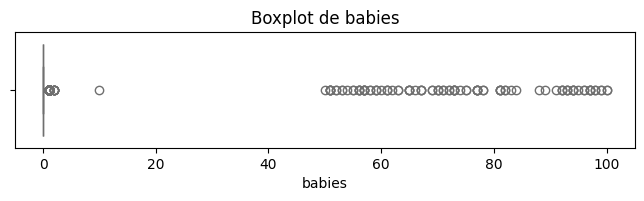

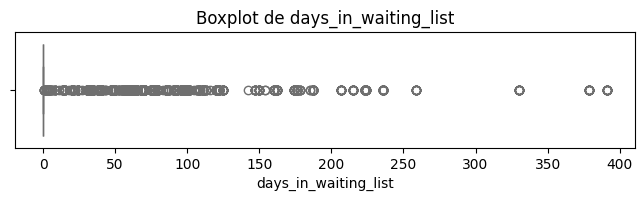

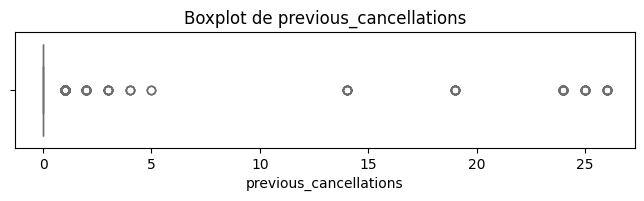

In [ ]:
num_cols = ['lead_time','adr','stays_in_weekend_nights','stays_in_week_nights',
            'adults','children','babies','days_in_waiting_list','previous_cancellations']

print("\n  Boxplots para detección de outliers")
for col in num_cols:
    if col in h_df.columns:
        plt.figure(figsize=(8,1.5))
        sns.boxplot(x=h_df[col], color="skyblue")
        plt.title(f"Boxplot de {col}")
        plt.show()

In [ ]:

outliers_babies = h_df[h_df["babies"] > 6]
print("Cantidad de reservas con más de 20 babies:", len(outliers_babies))

outliers_babies[["hotel","adults","children","babies","is_canceled"]].head()


Cantidad de reservas con más de 20 babies: 101


,hotel,adults,children,babies,is_canceled
1055,Resort Hotel,2,0,62,True
1070,Resort Hotel,2,0,57,False
2209,Resort Hotel,2,0,82,True
3318,Resort Hotel,2,0,65,False
5179,Resort Hotel,2,0,89,True


En el dataset se detectaron reservas con más de 20 bebés, incluso casos con 60 u 80, lo cual resulta ilógico ya que un hotel no puede recibir tal cantidad de bebés en una sola habitación y menos acompañados únicamente por dos adultos. Estos valores corresponden probablemente a errores de registro y, de mantenerse, distorsionarían el análisis, por lo que se considera adecuado eliminarlos y fijar un límite máximo razonable de 6 bebés por reserva.

In [ ]:
before = len(h_df)

h_df_clean = h_df[
    (h_df["lead_time"] <= 730) &
    (h_df["adr"] <= 1000) &
    (h_df["children"] <= 10) &
    (h_df["babies"] <= 6) &
    (h_df["days_in_waiting_list"] <= 365)
].copy()

after = len(h_df_clean)
print(f"Filas eliminadas por outliers extremos: {before - after}")
print("Shape final del dataset:", h_df_clean.shape)

Filas eliminadas por outliers extremos: 132
Shape final del dataset: (55804, 32)


In [ ]:
inconsistencias = h_df[
    ((h_df["is_canceled"] == 0) & (h_df["reservation_status"] == "Canceled"))
]

print("Cantidad de inconsistencias:", len(inconsistencias))


Cantidad de inconsistencias: 0


In [ ]:
inconsistencias = h_df[
    ((h_df["is_canceled"] == 1) & (h_df["reservation_status"] != "Canceled"))
]

print("Cantidad de inconsistencias:", len(inconsistencias))


Cantidad de inconsistencias: 769


In [ ]:
h_df["reservation_status"].unique()

<StringArray>
['Check-Out', 'Canceled', 'No-Show']
Length: 3, dtype: string

In [ ]:
if 'reservation_status' in h_df.columns:
    h_df = h_df.drop(columns=['reservation_status'])
    print("Columna 'reservation_status' eliminada.")

Columna 'reservation_status' eliminada.


In [ ]:
h_df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
27072,Resort Hotel,False,173,2016,August,34,15,1,3,3,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,196,0,0,Transient,143.00,0,0,2016-08-19
14553,Resort Hotel,False,10,2016,December,51,17,1,1,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,E,0,No Deposit,<NA>,0,0,Transient,64.00,0,2,2016-12-19
22454,Resort Hotel,False,43,2016,March,13,24,0,2,2,2,0,HB,PRT,Online TA,TA/TO,False,0,0,G,G,0,No Deposit,240,0,0,Transient,158.00,0,1,2016-03-26
23678,Resort Hotel,False,13,2016,April,18,29,0,2,2,0,0,BB,BRA,Online TA,TA/TO,False,0,0,E,E,0,No Deposit,240,0,0,Transient,93.00,1,1,2016-05-01
10053,Resort Hotel,True,238,2017,February,6,10,0,2,2,0,0,HB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,155,0,0,Transient,54.00,0,0,2016-12-15
46258,City Hotel,False,20,2015,December,53,28,1,2,2,0,0,BB,FRA,Online TA,TA/TO,False,0,0,D,A,0,No Deposit,7,0,0,Transient,70.42,0,0,2015-12-31
9364,Resort Hotel,True,65,2016,November,47,18,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,0,No Deposit,250,0,0,Transient,37.00,0,0,2016-09-16
23593,Resort Hotel,False,56,2016,April,18,25,1,3,2,0,0,BB,GBR,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,156,0,0,Transient-Party,39.10,0,0,2016-04-29
53932,City Hotel,True,39,2016,July,27,2,2,1,2,0,0,BB,GGY,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9,0,0,Transient,117.90,0,0,2016-05-24
52576,City Hotel,True,56,2016,June,24,8,0,1,2,0,0,BB,PRT,Offline TA/TO,Corporate,False,0,0,A,A,0,No Deposit,191,0,0,Transient-Party,120.00,0,0,2016-06-02


In [ ]:
h_df.shape

(55936, 31)

## 3.3 Analisis univariado

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


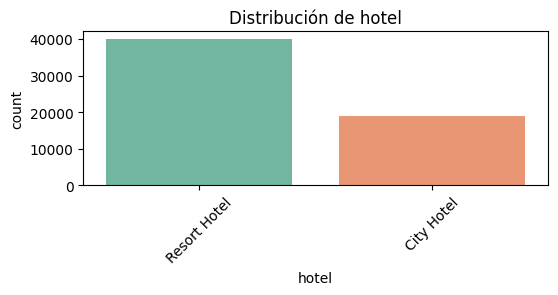

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


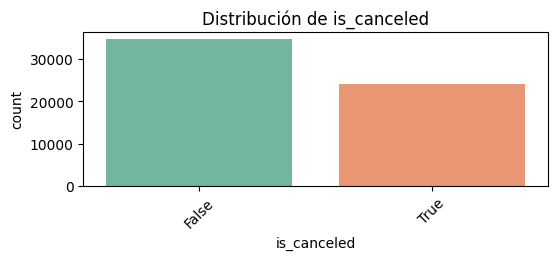

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


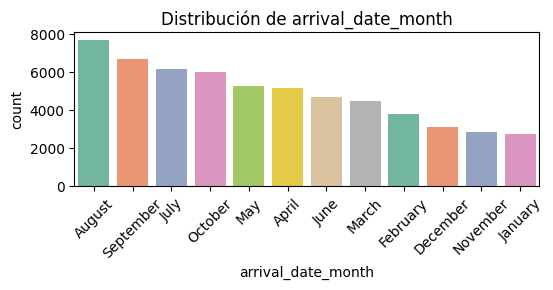

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


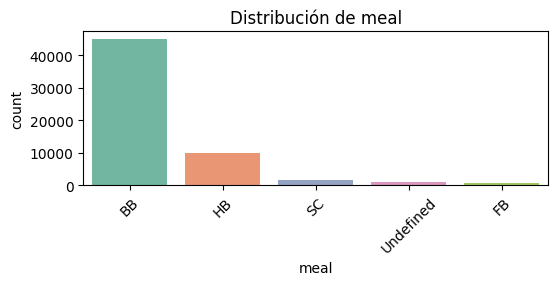

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


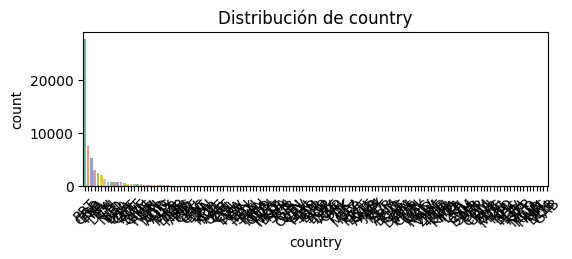

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


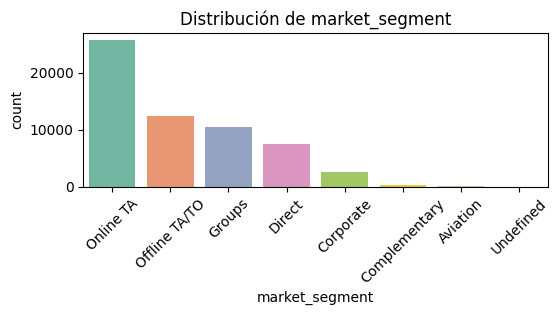

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


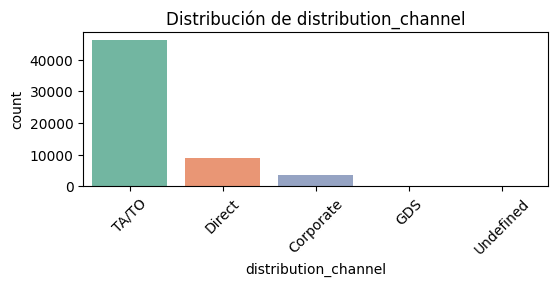

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


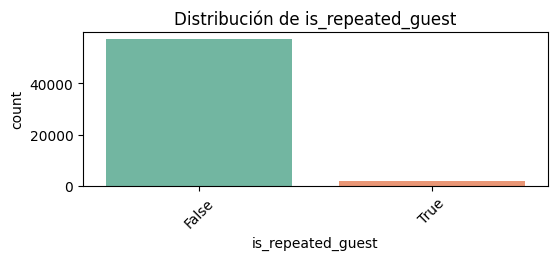

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


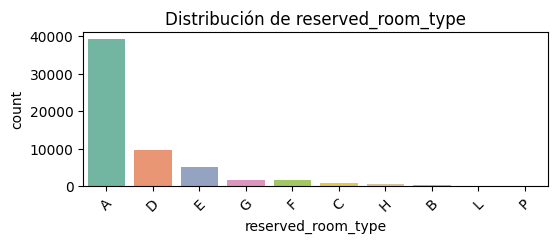

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


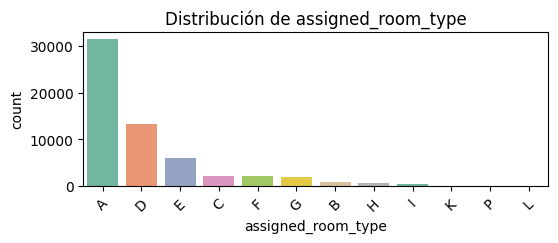

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


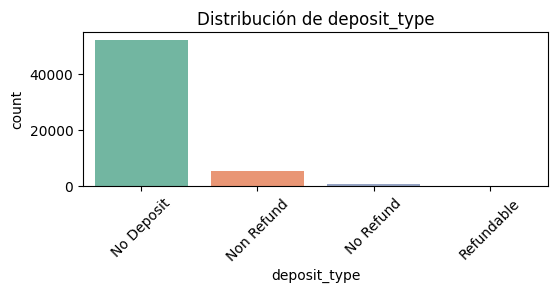

/tmp/ipython-input-754054576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")


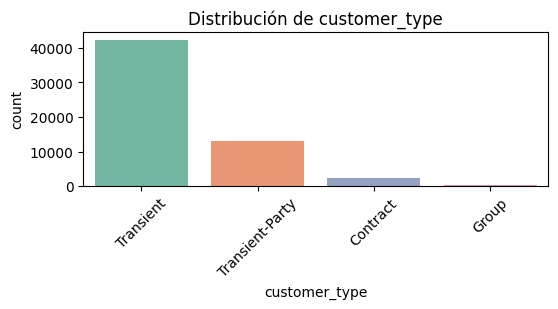

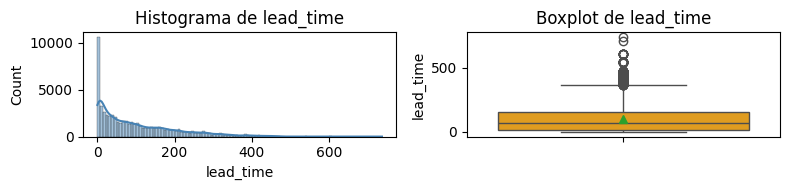

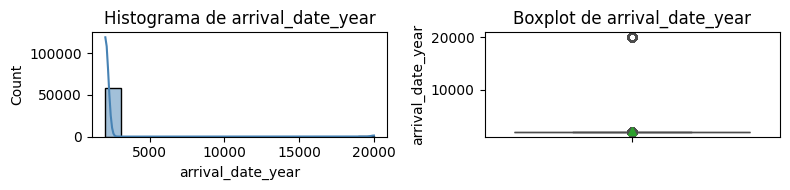

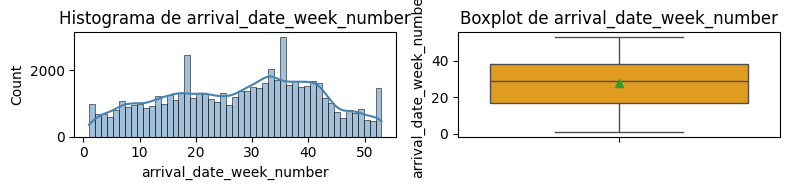

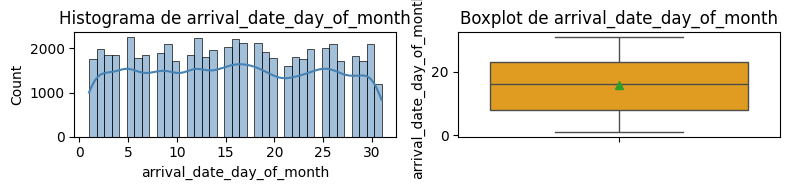

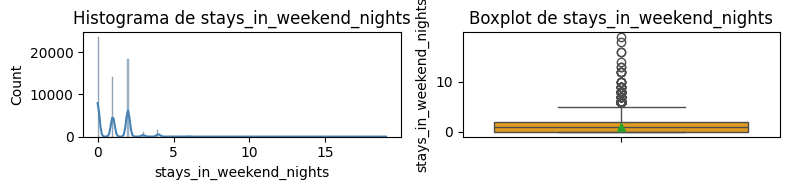

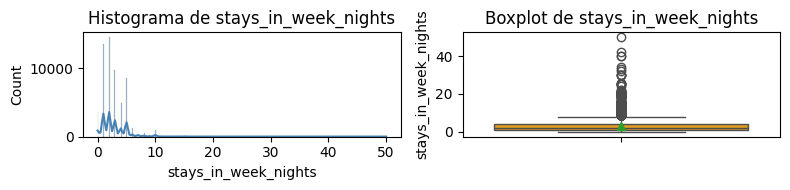

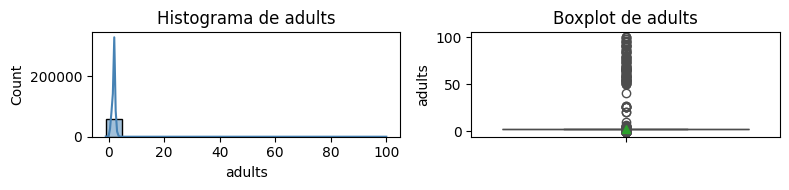

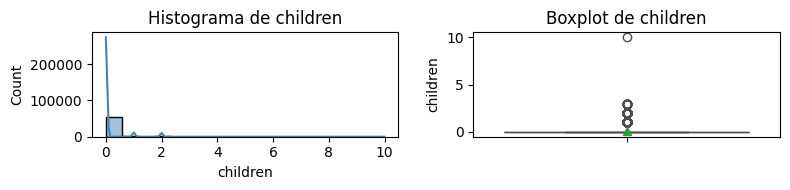

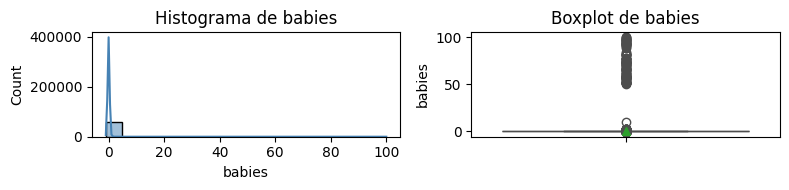

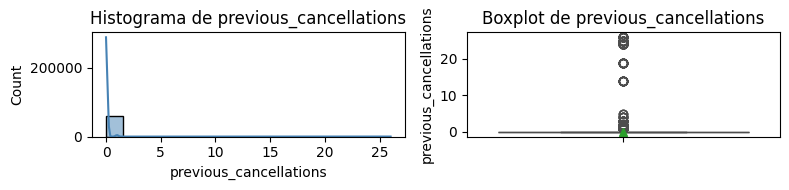

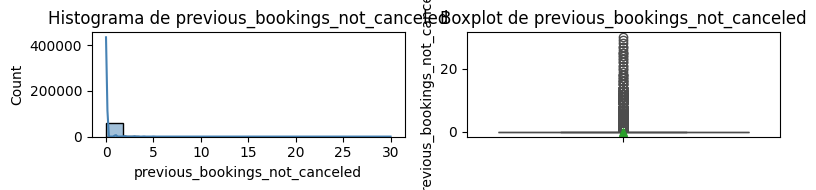

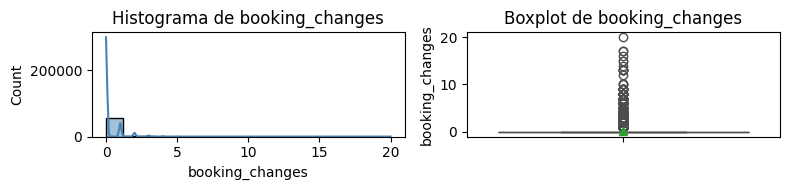

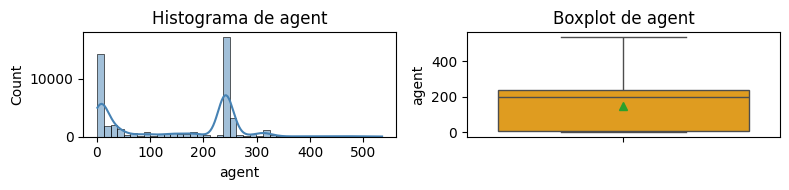

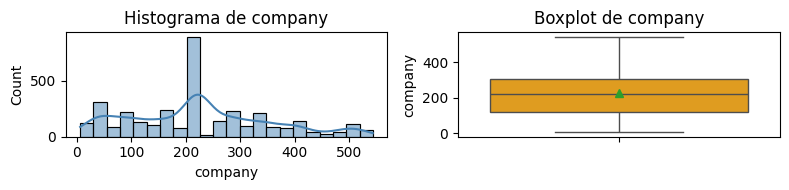

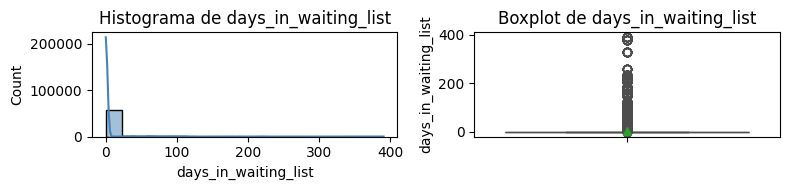

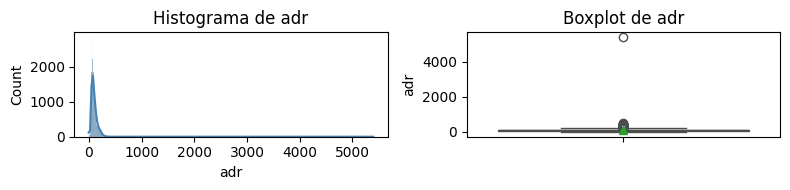

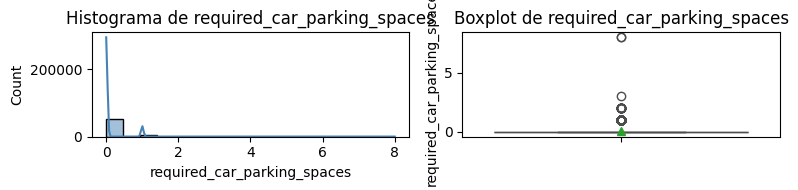

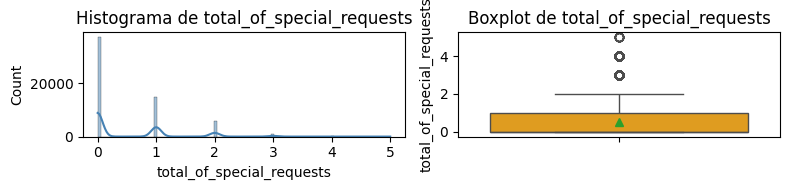

In [ ]:
cat_vars = h_df.select_dtypes(include=["object", "category", "boolean", "string"]).columns.tolist()
num_vars = h_df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Gráficos para categóricas
for var in cat_vars:
    plt.figure(figsize=(6,2))
    sns.countplot(data=hotel_df, x=var, order=hotel_df[var].value_counts().index, palette="Set2")
    plt.title(f"Distribución de {var}")
    plt.xticks(rotation=45)
    plt.show()

# Gráficos para numéricas
for var in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(8,2))

    # Histograma
    sns.histplot(hotel_df[var], kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"Histograma de {var}")

    # Boxplot
    sns.boxplot(y=hotel_df[var], ax=axes[1], color="orange", showmeans=True)
    axes[1].set_title(f"Boxplot de {var}")

    plt.tight_layout()
    plt.show()

**Análisis Univariado**

Se realizó un análisis exploratorio univariado de todas las variables del dataset, tanto categóricas como numéricas, mediante gráficas de barras, histogramas y boxplots. Esto permitió identificar la distribución de los datos, presencia de sesgos y valores atípicos.

**Variables categóricas**

- **Canal de distribución:** El canal de TA/TO (agencias de viaje en línea y operadores turísticos) concentra la mayoría de las reservas, seguido por las reservas directas. Esto confirma una fuerte dependencia de intermediarios digitales.  
- **Tipo de cliente:** Predominan ampliamente los clientes transitorios, mientras que los clientes de grupo y corporativos representan una fracción menor.  
- **Tipo de habitación reservada:** La mayoría de las reservas se realizan en la **habitación tipo A**, lo cual refleja baja diversificación en la ocupación de habitaciones.  
- **Depósito:** En la mayoría de los casos las reservas se hacen con No Deposit, lo cual puede estar relacionado con el alto número de cancelaciones observadas.  

**Variables numéricas**
- **Lead time (días de anticipación):** La mayoría de las reservas se realizan con poca anticipación, aunque existen valores extremos con más de 400 días. Se observa asimetría positiva y outliers significativos.  
- **ADR (Average Daily Rate):** La tarifa diaria promedio se concentra en valores bajos, pero aparecen **valores atípicos muy altos** que podrían distorsionar análisis si no se tratan.  
- **Estadía (stays_in_week_nights y stays_in_weekend_nights):** La mayoría de estadías son cortas (1–3 noches), aunque hay registros atípicos de largas estancias.  
- **Cambios en la reserva (booking_changes):** En la mayoría de casos no hay modificaciones, pero existen clientes que realizan múltiples cambios.  
- **Niños y bebés (children, babies):** La gran mayoría de reservas no incluyen niños ni bebés, aunque hay pocos casos de grupos grandes que destacan como outliers.  
- **Cancelaciones previas:** La mayoría de clientes no reporta cancelaciones pasadas, pero se identifican valores extremos con más de 20 cancelaciones históricas.  

**Principales hallazgos**
1. El dataset presenta una fuerte concentración de reservas en pocos canales y tipos de clientes, lo que puede generar dependencia del mercado digital.  
2. Variables numéricas como lead time y ADR muestran distribuciones asimétricas con outliers relevantes que deben considerarse en análisis posteriores.  
3. La mayoría de estadías son cortas, lo cual condiciona las estrategias de ocupación y fidelización.  
4. La prevalencia de reservas sin depósito y la existencia de clientes con múltiples cancelaciones pueden estar influyendo en el alto nivel de cancelaciones observado.  


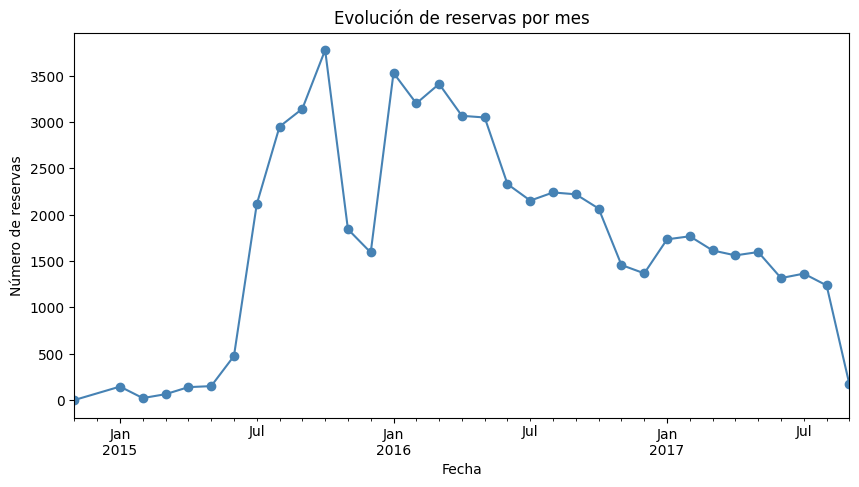

In [ ]:

hotel_df["reservation_status_date"] = pd.to_datetime(hotel_df["reservation_status_date"])

reservas_por_mes = hotel_df.groupby(hotel_df["reservation_status_date"].dt.to_period("M")).size()

reservas_por_mes.plot(kind="line", figsize=(10,5), marker="o", color="steelblue")
plt.title("Evolución de reservas por mes")
plt.ylabel("Número de reservas")
plt.xlabel("Fecha")
plt.show()

**Evolución de reservas por mes**

La serie temporal evidencia un crecimiento inicial en 2015, alcanzando un pico importante a mediados de 2016, donde se registraron más de 3.500 reservas en un mes. Posteriormente, se observa una tendencia descendente sostenida durante 2016 y 2017, con valores estabilizándose en un rango cercano a las 1.000–1.500 reservas mensuales.

Este comportamiento sugiere que, tras un período de expansión, la demanda comenzó a decrecer, lo cual podría deberse a factores externos (como cambios en el mercado turístico o la competencia) o internos (estrategias comerciales, dependencia excesiva de ciertos canales). Identificar las causas de este descenso resulta fundamental para plantear estrategias de recuperación en la ocupación hotelera.

## 3.4 Analisis Bivariado

/tmp/ipython-input-2908515929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="lead_time", data=h_df, palette="Set2")


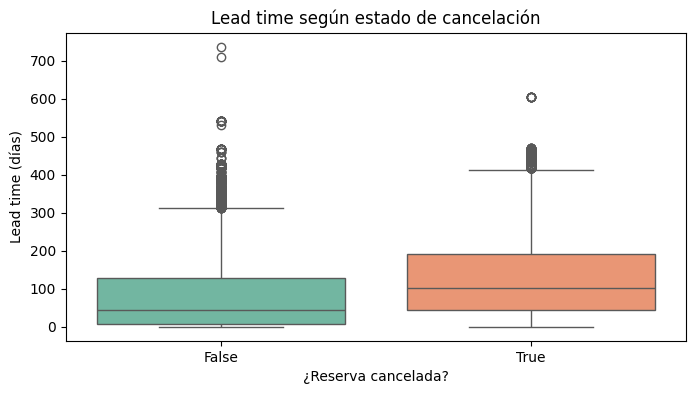

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="is_canceled", y="lead_time", data=h_df, palette="Set2")
plt.title("Lead time según estado de cancelación")
plt.xlabel("¿Reserva cancelada?")
plt.ylabel("Lead time (días)")
plt.show()


Las reservas canceladas suelen hacerse con mayor anticipación, lo que indica que a mayor lead time también aumenta el riesgo de que la reserva no se concrete.

/tmp/ipython-input-325255601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deposit_type", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")


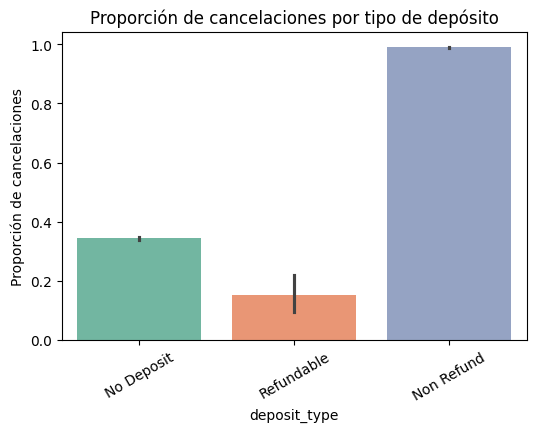

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x="deposit_type", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Proporción de cancelaciones por tipo de depósito")
plt.ylabel("Proporción de cancelaciones")
plt.xticks(rotation=30)
plt.show()


Las reservas con tipo Non Refund presentan la tasa de cancelación más alta, mientras que en Refundable y No Deposit la proporción es considerablemente menor.

/tmp/ipython-input-1838558058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="distribution_channel", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")


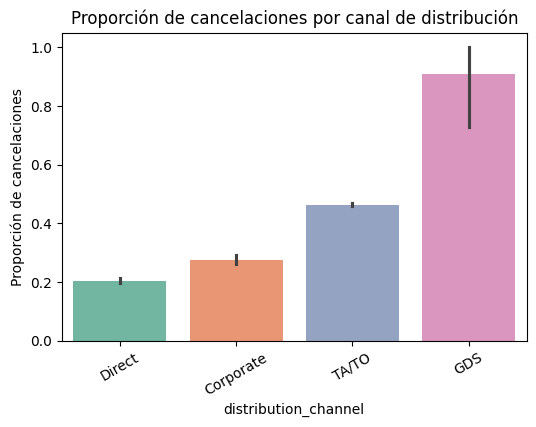

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="distribution_channel", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Proporción de cancelaciones por canal de distribución")
plt.ylabel("Proporción de cancelaciones")
plt.xticks(rotation=30)
plt.show()


El canal TA/TO concentra la mayoría de reservas y un nivel medio de cancelaciones, mientras que GDS muestra una tasa de cancelación muy alta pese a tener pocas reservas.

/tmp/ipython-input-844584242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_type", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")


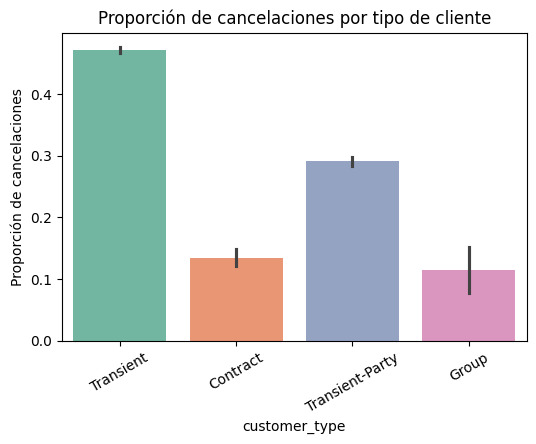

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="customer_type", y="is_canceled", data=h_df, estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Proporción de cancelaciones por tipo de cliente")
plt.ylabel("Proporción de cancelaciones")
plt.xticks(rotation=30)
plt.show()



Los clientes Transient son quienes más cancelan, en contraste con los grupos y contratos que presentan una proporción mucho más baja.

/tmp/ipython-input-2726856043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="adr", data=h_df, palette="Set2")


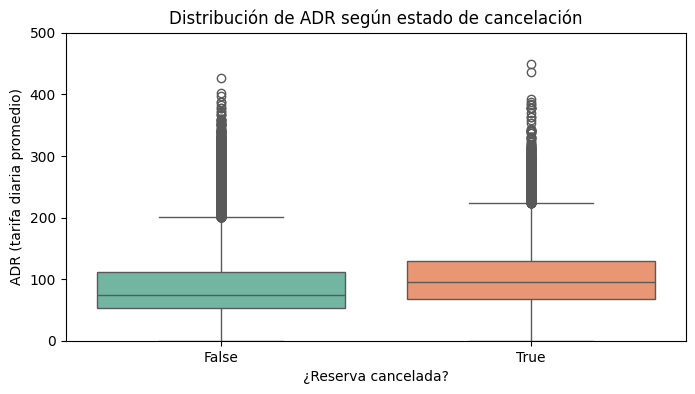

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="is_canceled", y="adr", data=h_df, palette="Set2")
plt.title("Distribución de ADR según estado de cancelación")
plt.xlabel("¿Reserva cancelada?")
plt.ylabel("ADR (tarifa diaria promedio)")
plt.ylim(0, 500)  # para no distorsionar por outliers extremos
plt.show()


La tarifa diaria promedio (ADR) no varía significativamente entre reservas canceladas y no canceladas, aunque existen outliers con tarifas inusualmente altas.

/tmp/ipython-input-3262629547.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="arrival_date_month", y="adr", data=h_df, estimator="mean", ci=None, marker="o")


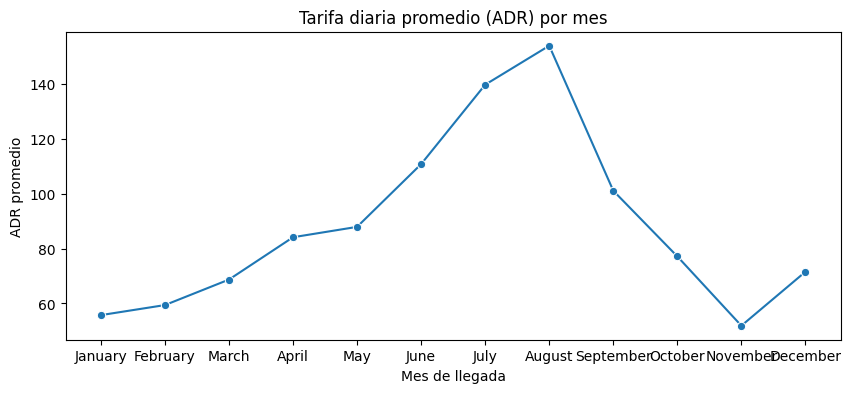

In [ ]:

plt.figure(figsize=(10,4))
sns.lineplot(x="arrival_date_month", y="adr", data=h_df, estimator="mean", ci=None, marker="o")
plt.title("Tarifa diaria promedio (ADR) por mes")
plt.xlabel("Mes de llegada")
plt.ylabel("ADR promedio")
plt.show()

El ADR promedio es claramente estacional, subiendo en verano (julio/agosto) y bajando en invierno, lo que refleja la influencia de la demanda turística.

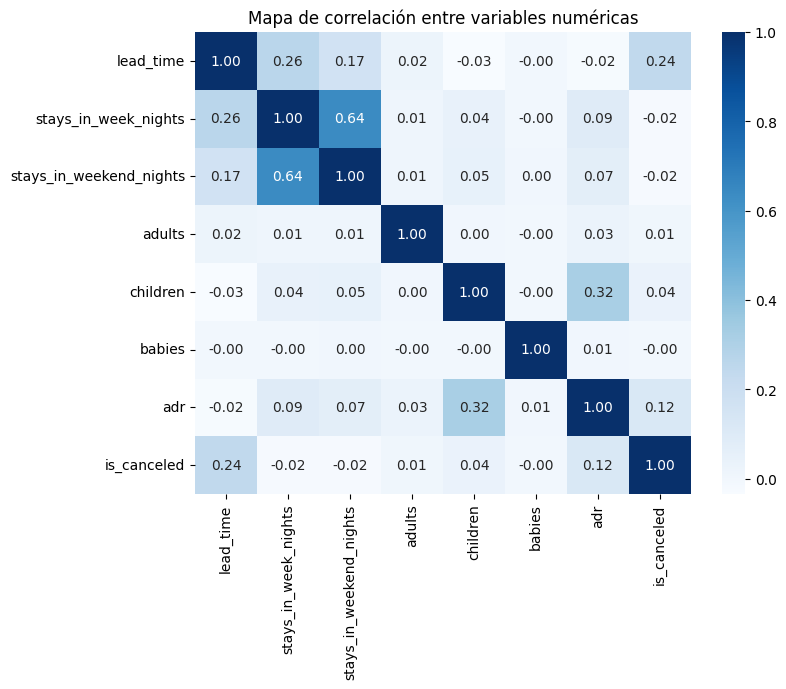

In [ ]:

plt.figure(figsize=(8,6))
num_cols = ["lead_time","stays_in_week_nights","stays_in_weekend_nights",
            "adults","children","babies","adr","is_canceled"]
corr = h_df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Mapa de correlación entre variables numéricas")
plt.show()




La tasa de cancelación es más alta en meses de temporada alta como junio y julio, y más baja en noviembre y diciembre.


/tmp/ipython-input-403822124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="arrival_date_month", y="is_canceled", data=h_df,


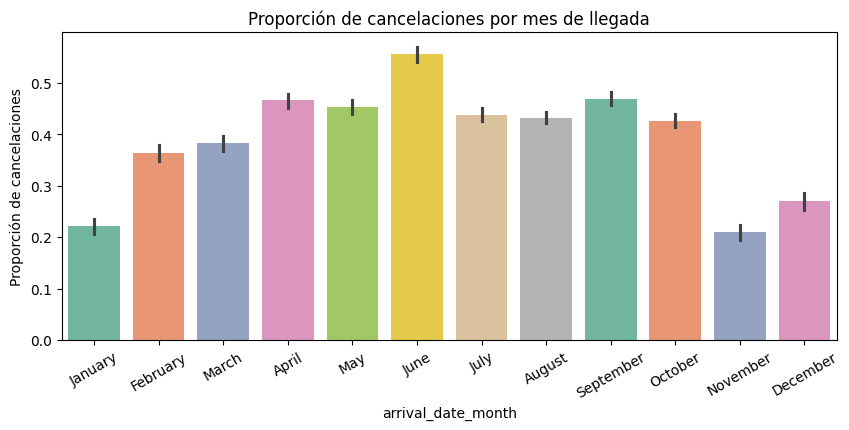

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x="arrival_date_month", y="is_canceled", data=h_df,
            estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Proporción de cancelaciones por mes de llegada")
plt.ylabel("Proporción de cancelaciones")
plt.xticks(rotation=30)
plt.show()



La mayoría de estadías son cortas y no muestran diferencias relevantes entre canceladas y no canceladas.

/tmp/ipython-input-4154094762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="total_nights", data=h_df, palette="Set2")


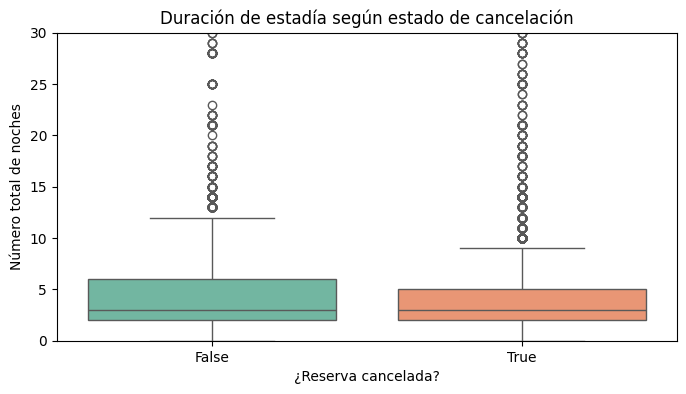

In [ ]:
h_df["total_nights"] = h_df["stays_in_week_nights"] + h_df["stays_in_weekend_nights"]

plt.figure(figsize=(8,4))
sns.boxplot(x="is_canceled", y="total_nights", data=h_df, palette="Set2")
plt.title("Duración de estadía según estado de cancelación")
plt.xlabel("¿Reserva cancelada?")
plt.ylabel("Número total de noches")
plt.ylim(0, 30)
plt.show()


No se observa una relación clara entre número de huéspedes y tarifa promedio; la mayoría de reservas corresponden a pocos huéspedes con ADR en rangos bajos y medios.

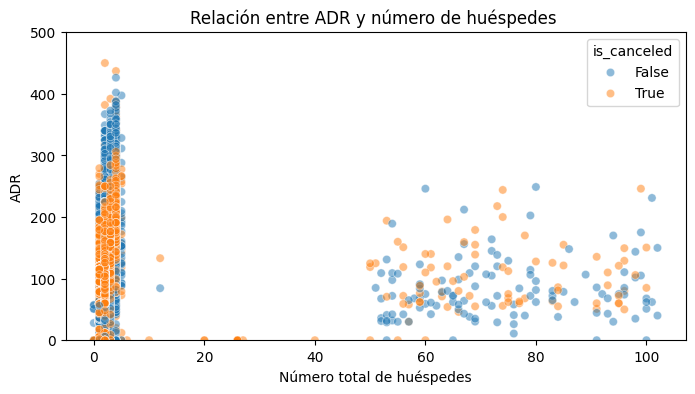

In [ ]:
h_df["total_guests"] = h_df["adults"] + h_df["children"] + h_df["babies"]

plt.figure(figsize=(8,4))
sns.scatterplot(x="total_guests", y="adr", hue="is_canceled", data=h_df, alpha=0.5)
plt.title("Relación entre ADR y número de huéspedes ")
plt.xlabel("Número total de huéspedes")
plt.ylabel("ADR")
plt.ylim(0, 500)
plt.show()

Las correlaciones fuertes solo aparecen entre variables de noches de estadía; la relación entre **is_canceled** y las variables numéricas es baja, lo que sugiere que las categóricas son más determinantes en las cancelaciones.

## 3.5 Análisis multivariado

In [ ]:
# Contar reservas por tipo de hotel y mes
reservas_por_mes_hotel = hotel_df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='numero_reservas')

# Crear una tabla pivote para mejor visualización
pivot_table = reservas_por_mes_hotel.pivot_table(
    values='numero_reservas',
    index='arrival_date_month',
    columns='hotel',
    fill_value=0
)

print("Reservas por mes y tipo de hotel:")
print(pivot_table)

Reservas por mes y tipo de hotel:
hotel               City Hotel  Resort Hotel
arrival_date_month                          
April                   1575.0        3610.0
August                  2821.0        4894.0
December                 473.0        2648.0
February                 727.0        3103.0
January                  565.0        2193.0
July                    1604.0        4573.0
June                    1680.0        3045.0
March                   1156.0        3336.0
May                     1723.0        3560.0
November                 420.0        2437.0
October                 2484.0        3556.0
September               3604.0        3108.0


<Figure size 1400x800 with 0 Axes>

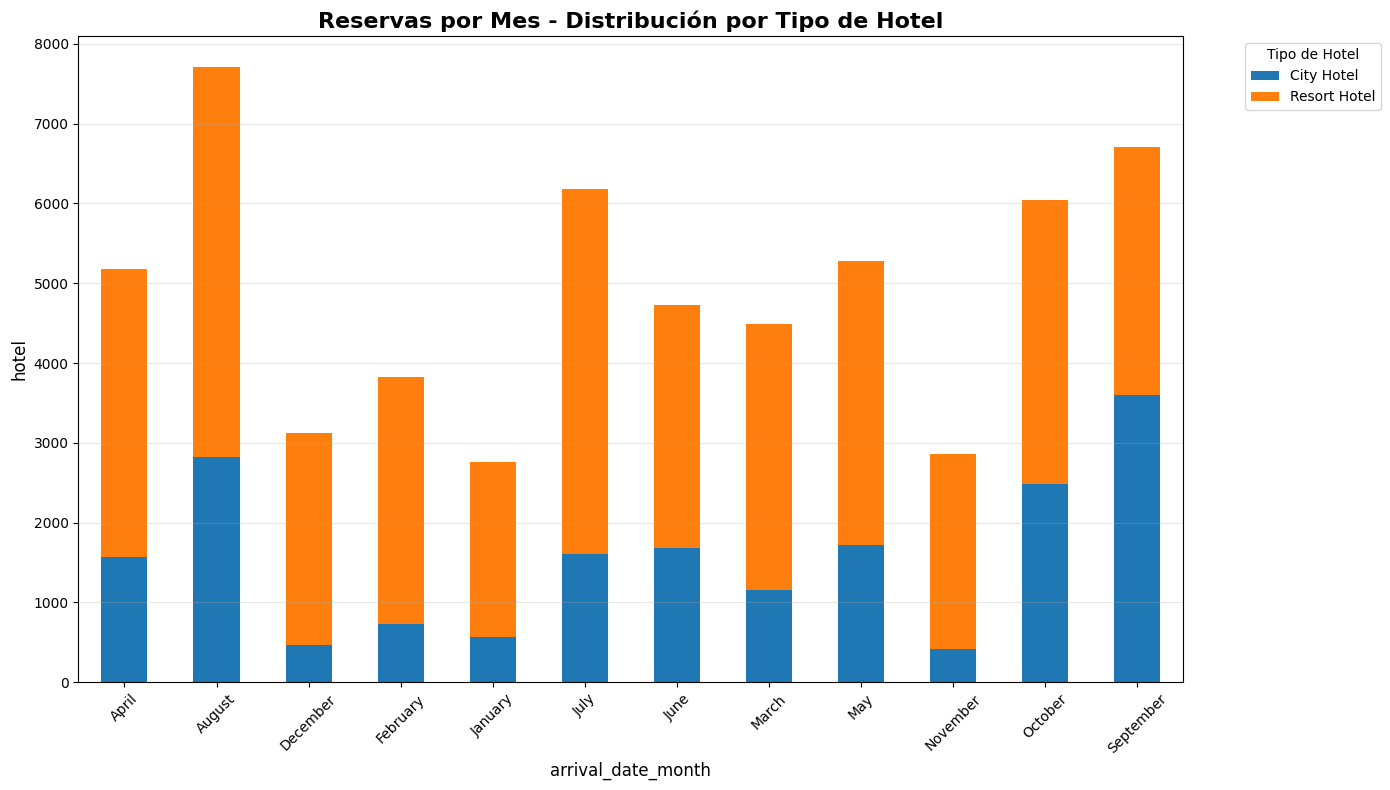

In [ ]:
plt.figure(figsize=(14, 8))

# Gráfico de barras apiladas por tipo de hotel
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Reservas por Mes - Distribución por Tipo de Hotel', fontsize=16, fontweight='bold')
plt.xlabel('arrival_date_month', fontsize=12)
plt.ylabel('hotel', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Hotel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Variables Categóricas:

Month(arrival_date_month): Se encuentra que los meses de Junio a Septiembre hay un pico de estacionalidad marcado para los hoteles resort.

Hotel: Las reservas en hoteles tipo resort son muy superiores a las realizadas en los tipo ciudad en cualquier época del año, lo cual puede indicar una menor tasa de ocupación y una alta tasa de cancelación de reservas.

Variables agregadas:
Cantidad reservas: Número de reservas realizadas por mes y por tipo de hotel
La cantidad de reservas en los hoteles de tipo ciudad es considerablemente baja en comparación a las reservaciones de los hoteles tipo resort. Esto puede indicar un bajo índice de ocupación, lo cual impacta los ingresos obtenidos en este tipo de hoteles.

Por otra parte, en temporada de verano los hoteles resort poseen la mayor cantidad de reservas, lo que permite balancear los periodos donde la vacancia tiende a ser menor(Enero y Noviembre).

In [ ]:
# Crear rangos de días de anticipación
bins = [0, 7, 30, 90, 180, 365]
labels = ['0-7 días', '8-30 días', '31-90 días', '91-180 días', '181-365 días']
hotel_df['lead_range'] = pd.cut(hotel_df['lead_time'], bins=bins, labels=labels, right=True)

In [ ]:
hotel_df['is_canceled'].groupby(hotel_df['is_canceled']).count()

,is_canceled
is_canceled,
False,34666
True,24229


In [ ]:
#Muestra las características de la variable de rango en días de anticipación creada
hotel_df['lead_range'].describe()

,lead_range
count,53957
unique,5
top,31-90 días
freq,14607


<Figure size 1400x800 with 0 Axes>

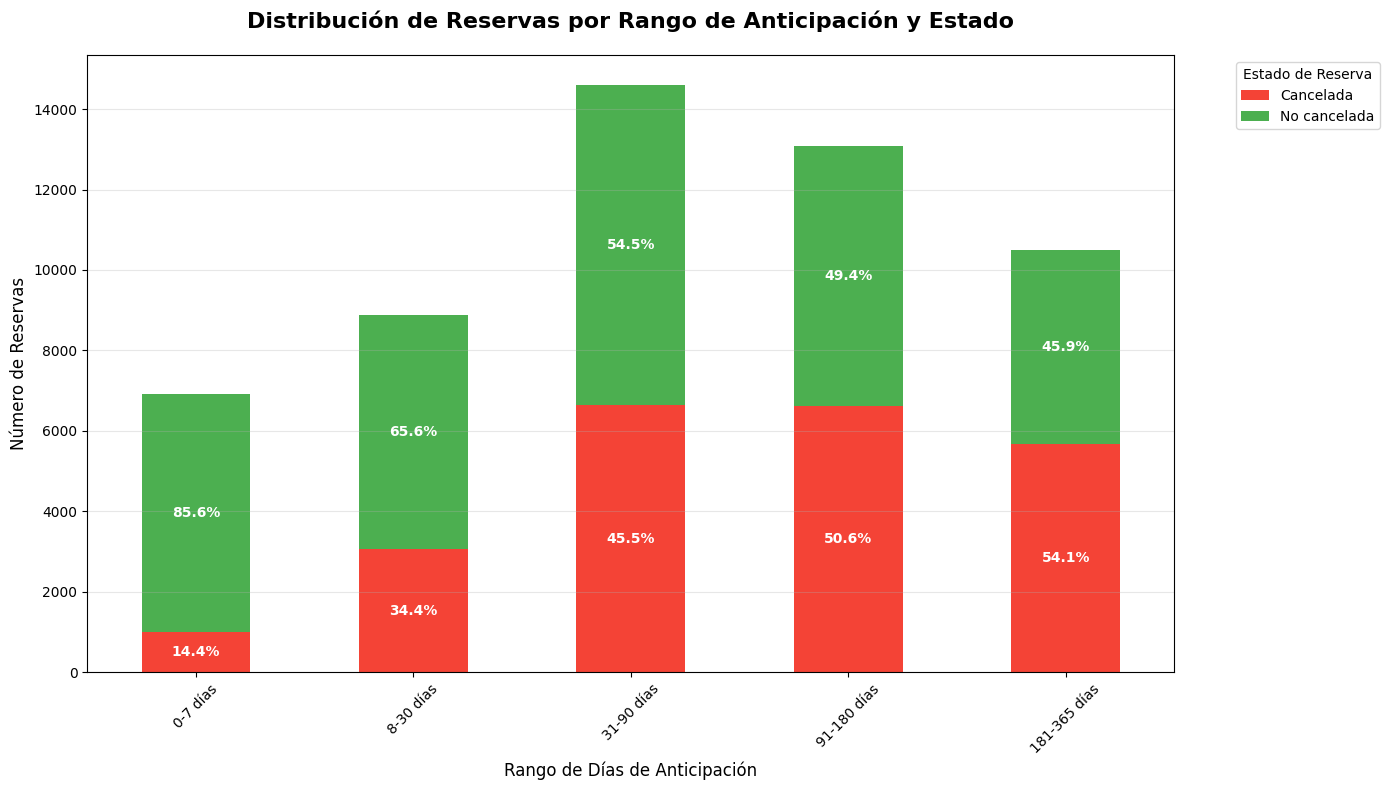

In [ ]:
# Preparar datos para gráfico apilado
stacked_data = pd.crosstab(
    index=hotel_df['lead_range'],
    columns=hotel_df['is_canceled'].map({True: 'Cancelada', False: 'No cancelada'})
)

plt.figure(figsize=(14, 8))
colors = ['#F44336','#4CAF50']  # Verde para no canceladas, Rojo para canceladas

ax = stacked_data.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8))

plt.title('Distribución de Reservas por Rango de Anticipación y Estado',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Rango de Días de Anticipación', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Estado de Reserva', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir porcentajes en las barras
for i, (idx, row) in enumerate(stacked_data.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, value in enumerate(row):
        if value > 0:
            percentage = (value / total) * 100
            ax.text(i, cumulative + value/2, f'{percentage:.1f}%',
                   ha='center', va='center', fontweight='bold', color='white')
        cumulative += value

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Variables categóricas:
Estado de reserva: Dichas reservas pueden ser canceladas porque el huesped no realizó el depósito o no se presentó. Para los otros casos, se considera como efectiva.

Variables segregadas:
Rango de días de cancelación: Para reservas con 30 o más días de anticipación, se evidencia que la probabilidad de cancelación está por encima del 45%, lo cual puede reflejar un clausulado poco restrictivo al momento de realizar la reserva.

La mayor cantidad de cancelaciones de reservas se producen sobre reservas realizadas entre 3 y 6 meses de anticipación, lo cual permite planificar la distribución de las habitaciones del hotel en caso de una contingencia. Sin embargo, indica que no hay incentivos para realizar las reservas con suficiente anticipación o que las políticas de cancelación son demasiado flexibles.



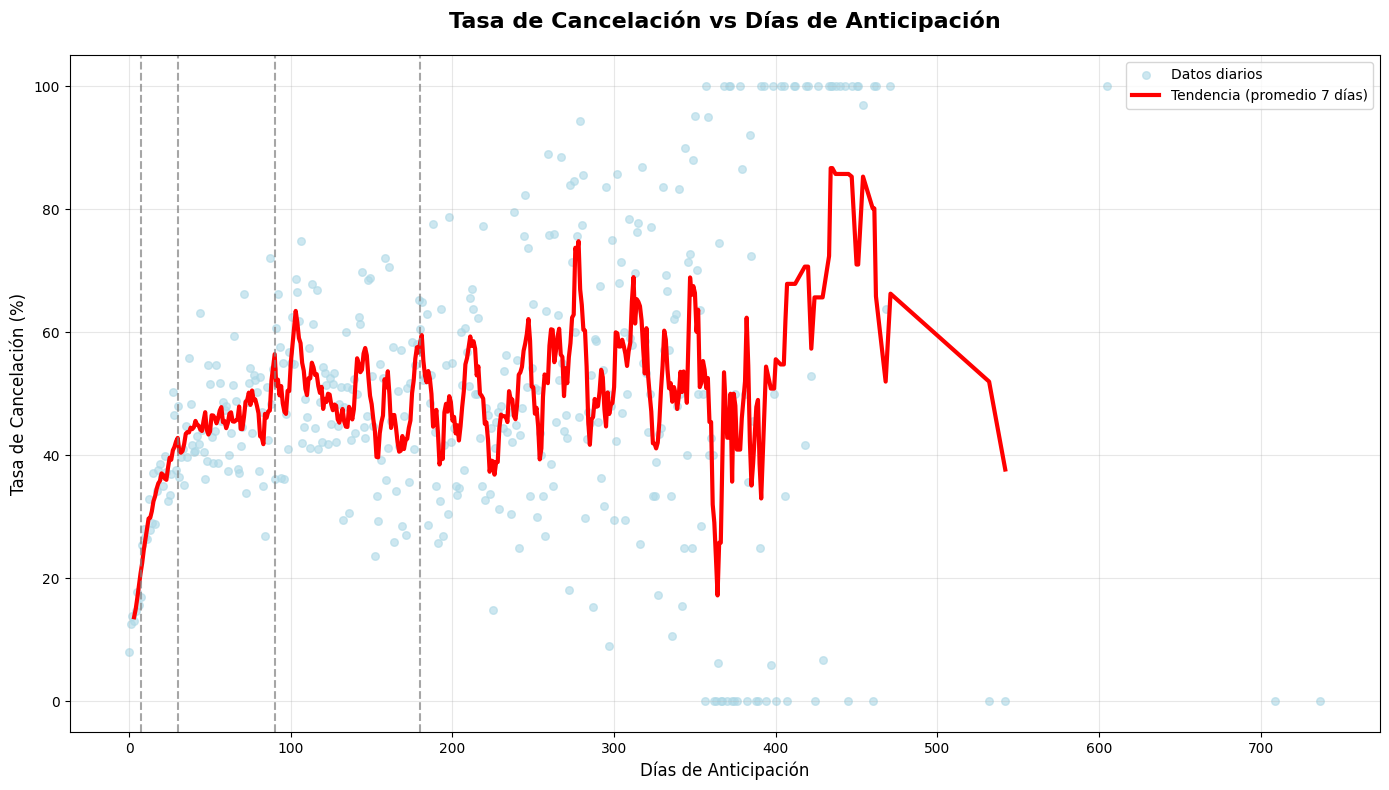

In [ ]:
plt.figure(figsize=(14, 8))

# Calcular tasa de cancelación por día de anticipación (promedio móvil para suavizar)
cancelacion_por_dia = hotel_df.groupby('lead_time')['is_canceled'].mean().reset_index()
cancelacion_por_dia['tasa_cancelacion'] = cancelacion_por_dia['is_canceled'] * 100

# Usar promedio móvil para suavizar la tendencia
cancelacion_por_dia['tasa_suavizada'] = cancelacion_por_dia['tasa_cancelacion'].rolling(window=7, center=True).mean()

# Scatter plot con tendencia
plt.scatter(cancelacion_por_dia['lead_time'], cancelacion_por_dia['tasa_cancelacion'],
           alpha=0.6, s=30, color='lightblue', label='Datos diarios')

# Línea de tendencia suavizada
plt.plot(cancelacion_por_dia['lead_time'], cancelacion_por_dia['tasa_suavizada'],
        color='red', linewidth=3, label='Tendencia (promedio 7 días)')

# Añadir líneas verticales para los rangos
for bin_edge in bins[1:-1]:
    plt.axvline(x=bin_edge, color='gray', linestyle='--', alpha=0.7)

plt.title('Tasa de Cancelación vs Días de Anticipación', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Días de Anticipación', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Las reservas realizadas con más de seis meses de antelación presentan una tasa de cancelación proyectada del 75%, lo que representa una vulnerabilidad crítica en la estrategia comercial actual.

La falta de estímulos sólidos para mantener la reserva en firme sugiere una baja percepción de valor por parte del cliente en el largo plazo y poca  expectativa de fidelización con los clientes.



In [ ]:
# Contar reservas por tipo de hotel y mes
cancelaciones_por_mes_hotel = hotel_df.groupby(['arrival_date_month','is_canceled', 'hotel']).size().reset_index(name='numero_cancelaciones')

# Crear una tabla pivote para mejor visualización
pivot_table2 = cancelaciones_por_mes_hotel.pivot_table(
    values='numero_cancelaciones',
    index='arrival_date_month',
    columns=('hotel','is_canceled'),
    fill_value=0
)

print("Cancelaciones por mes y tipo de hotel:")
print(pivot_table2)

Cancelaciones por mes y tipo de hotel:
hotel              City Hotel         Resort Hotel        
is_canceled             False   True         False   True 
arrival_date_month                                        
April                   224.0  1351.0       2551.0  1059.0
August                 1155.0  1666.0       3257.0  1637.0
December                257.0   216.0       2017.0   631.0
February                160.0   567.0       2308.0   795.0
January                 304.0   261.0       1868.0   325.0
July                    329.0  1275.0       3137.0  1436.0
June                     66.0  1614.0       2038.0  1007.0
March                   230.0   926.0       2573.0   763.0
May                     364.0  1359.0       2535.0  1025.0
November                288.0   132.0       1976.0   461.0
October                 885.0  1599.0       2577.0   979.0
September              1465.0  2139.0       2102.0  1006.0


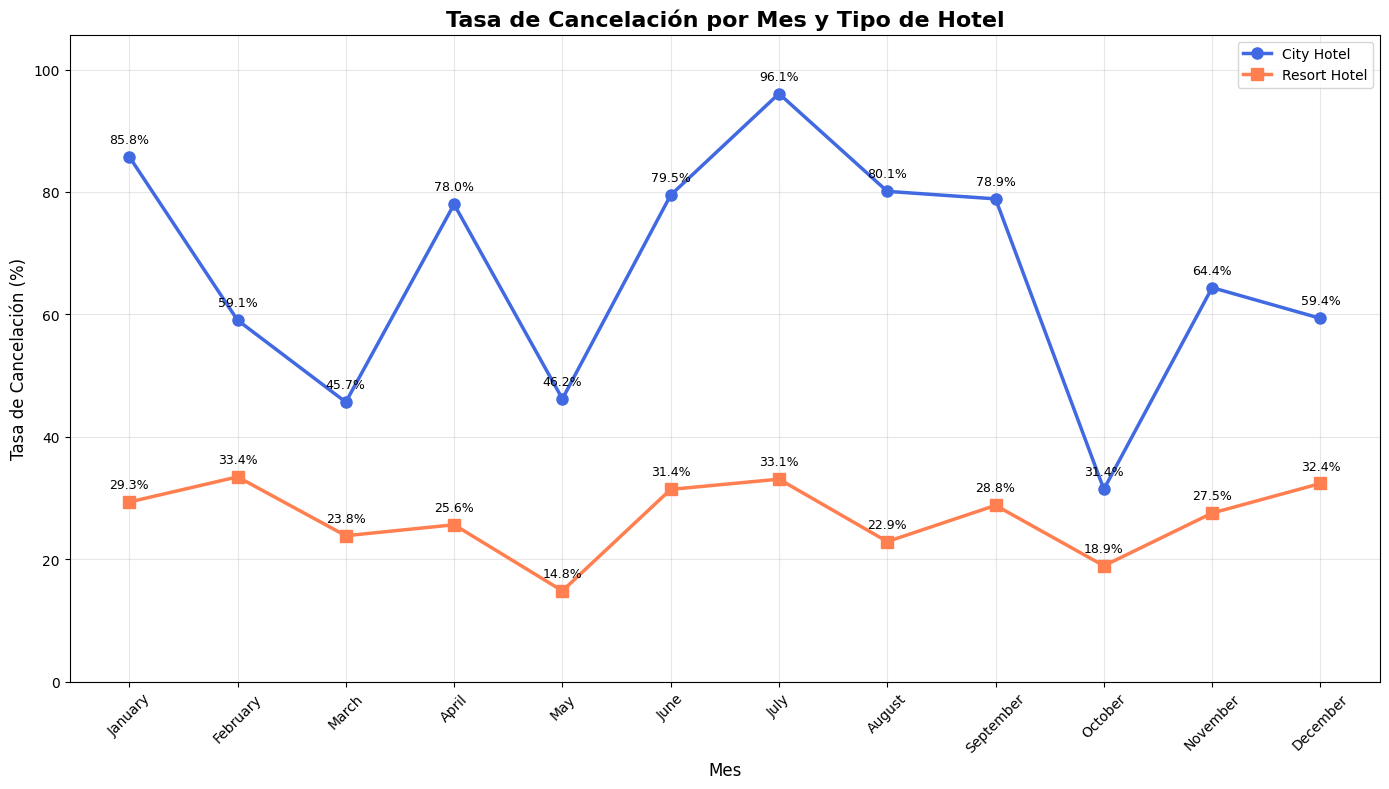

In [ ]:
plt.figure(figsize=(14, 8))

# Calcular tasas de cancelación
total_city = pivot_table2['City Hotel'].sum(axis=1)
tasa_cancelacion_city = (pivot_table2[('City Hotel', True)] / total_city) * 100

total_resort = pivot_table2['Resort Hotel'].sum(axis=1)
tasa_cancelacion_resort = (pivot_table2[('Resort Hotel', True)] / total_resort) * 100


plt.plot(valid_months, tasa_cancelacion_city, 'o-', linewidth=2.5,
         markersize=8, label='City Hotel', color='royalblue')
plt.plot(valid_months, tasa_cancelacion_resort, 's-', linewidth=2.5,
         markersize=8, label='Resort Hotel', color='coral')

plt.title('Tasa de Cancelación por Mes y Tipo de Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0, max(max(tasa_cancelacion_city), max(tasa_cancelacion_resort)) * 1.1)

# Añadir values en los puntos
for i, (city, resort) in enumerate(zip(tasa_cancelacion_city, tasa_cancelacion_resort)):
    plt.annotate(f'{city:.1f}%', (i, city), textcoords="offset points",
                 xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f'{resort:.1f}%', (i, resort), textcoords="offset points",
                 xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

El análisis de cancelaciones entre hoteles revela una alta volatilidad en establecimientos tipo Ciudad, con fluctuaciones significativas a lo largo del año. Este patrón no solo afecta la estabilidad operativa, sino que plantea un desafío directo a la sostenibilidad financiera del modelo urbano.

**Hallazgos clave:**
- Las cancelaciones en hoteles urbanos presentan una variabilidad estacional elevada, dificultando la planificación de recursos y la optimización de tarifas.
- La falta de mecanismos de retención y diferenciación en este segmento contribuye a una menor resiliencia comercial frente a cambios en la demanda.
- Pese a que la curva de cancelaciones en tipo resort es más suvizada y predecible, existe un área de oportunidad para que pueda ser reducido mediante estrategias comerciales.


In [ ]:
# Contar reservas por tipo de hotel y mes
cancelaciones_por_tipo_cliente = hotel_df[hotel_df['hotel']=="City Hotel"].groupby(['arrival_date_month','is_canceled','customer_type']).size().reset_index(name='numero_canc_tipo_cliente')

# Crear una tabla pivote para mejor visualización
pivot_table3 = cancelaciones_por_tipo_cliente.pivot_table(
    values='numero_canc_tipo_cliente',
    index='arrival_date_month',
    columns=('is_canceled','customer_type'),
    fill_value=0
)

print("Cancelaciones por mes, tipo de hotel y tipo de cliente:")
print(pivot_table3)

Cancelaciones por mes, tipo de hotel y tipo de cliente:
is_canceled           False                                    True         \
customer_type      Contract Group Transient Transient-Party Contract Group   
arrival_date_month                                                           
April                   0.0   0.0     140.0            81.0     12.0   1.0   
August                186.0   4.0     412.0           545.0     36.0   1.0   
December               23.0   0.0     140.0            91.0      9.0   0.0   
February                0.0   0.0     134.0            24.0      2.0   0.0   
January                 0.0   0.0     203.0            96.0      0.0   0.0   
July                    0.0   0.0     102.0           224.0      2.0   0.0   
June                    0.0   0.0      29.0            37.0      1.0   0.0   
March                   0.0   0.0     170.0            56.0      5.0   0.0   
May                     0.0   0.0     108.0           252.0      4.0   0.0   
November

In [ ]:
# Reindexar la pivot table para ordenar los meses
pivot_table3_ordered = pivot_table3.reindex(valid_months)

# Definir colores para tipos de cliente
colores_tipos = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']
nombres_tipos = pivot_table3_ordered.columns.get_level_values('customer_type').unique()

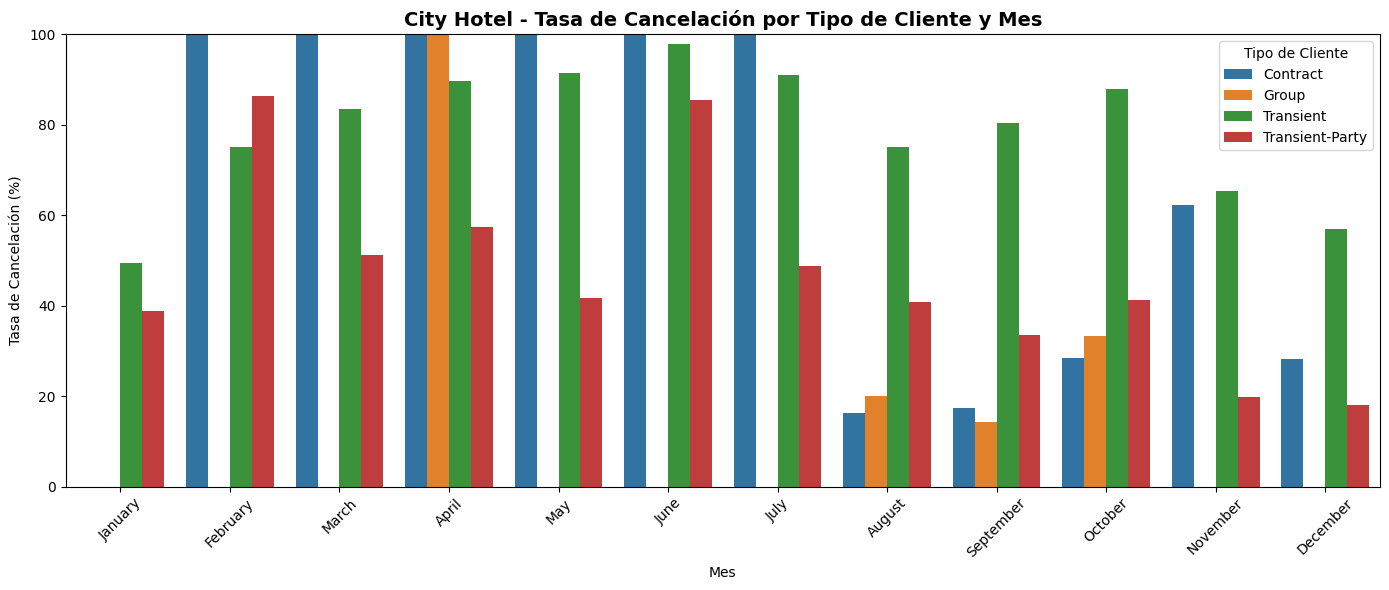

In [ ]:
df_cancelaciones = []

for tipo_cliente in nombres_tipos:
    try:
        no_canceladas = pivot_table3_ordered.xs((False, tipo_cliente),
                                                level=['is_canceled','customer_type'], axis=1)
        canceladas = pivot_table3_ordered.xs((True, tipo_cliente),
                                             level=['is_canceled','customer_type'], axis=1)

        total = no_canceladas.iloc[:,0] + canceladas.iloc[:,0]
        tasa = (canceladas.iloc[:,0] / total) * 100

        df_temp = pd.DataFrame({
            "Mes": valid_months,
            "TasaCancelacion": tasa.values,
            "TipoCliente": tipo_cliente
        })

        df_cancelaciones.append(df_temp)

    except KeyError:
        print(f"No hay datos para {tipo_cliente}")
        continue

df_cancelaciones = pd.concat(df_cancelaciones)

df_cancelaciones_clean = (
    df_cancelaciones
    .groupby(["Mes","TipoCliente"], as_index=False)["TasaCancelacion"]
    .mean()
)

orden_meses = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

df_cancelaciones_clean["Mes"] = pd.Categorical(
    df_cancelaciones_clean["Mes"],
    categories=orden_meses,
    ordered=True
)

plt.figure(figsize=(14,6))
sns.barplot(data=df_cancelaciones_clean, x="Mes", y="TasaCancelacion", hue="TipoCliente")

plt.title("City Hotel - Tasa de Cancelación por Tipo de Cliente y Mes", fontsize=14, fontweight="bold")
plt.ylabel("Tasa de Cancelación (%)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Tipo de Cliente")
plt.tight_layout()
plt.show()


Las tasas de cancelación en los tipo de cliente Contract son bastante inestables y requieren de una atención de parte del área de mercadeo para entender los motivos que llevan a tener una alta tasa de cancelación a lo largo del año.

Para los grupos Trasient y Trasient-party, existe también una tasa de cancelación superior al 40% que tiene un impacto en la planificación de las ofertas y aprovechamiento de los espacios en los meses de alta demanda.

Por otra parte, los tipo de cliente group no hay información significativa a lo largo del año que pueda indicar una tendencia en las cancelaciones.

In [ ]:
# Compare stays in week nights and weekend nights by month and hotel

# Group by month and hotel and calculate the mean of stays in week nights and weekend nights
stays_by_month_hotel = hotel_df[hotel_df['is_canceled'] == False].groupby(['arrival_date_month', 'hotel'])[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().reset_index()

# Set both 'arrival_date_month' and 'hotel' as index before reindexing
stays_by_month_hotel_ordered = stays_by_month_hotel.set_index(['arrival_date_month', 'hotel']).reindex(pd.MultiIndex.from_product([valid_months, stays_by_month_hotel['hotel'].unique()], names=['arrival_date_month', 'hotel'])).reset_index()

print("Average stays in week nights and weekend nights by month and hotel:")
display(stays_by_month_hotel_ordered)

Average stays in week nights and weekend nights by month and hotel:


,arrival_date_month,hotel,stays_in_week_nights,stays_in_weekend_nights
0,January,City Hotel,1.944079,0.720395
1,January,Resort Hotel,1.988758,0.708244
2,February,City Hotel,2.29375,0.9375
3,February,Resort Hotel,2.178076,0.852686
4,March,City Hotel,2.847826,0.965217
5,March,Resort Hotel,2.794792,0.913719
6,April,City Hotel,2.964286,0.950893
7,April,Resort Hotel,2.72207,1.057624
8,May,City Hotel,2.774725,0.480769
9,May,Resort Hotel,3.056016,1.175937


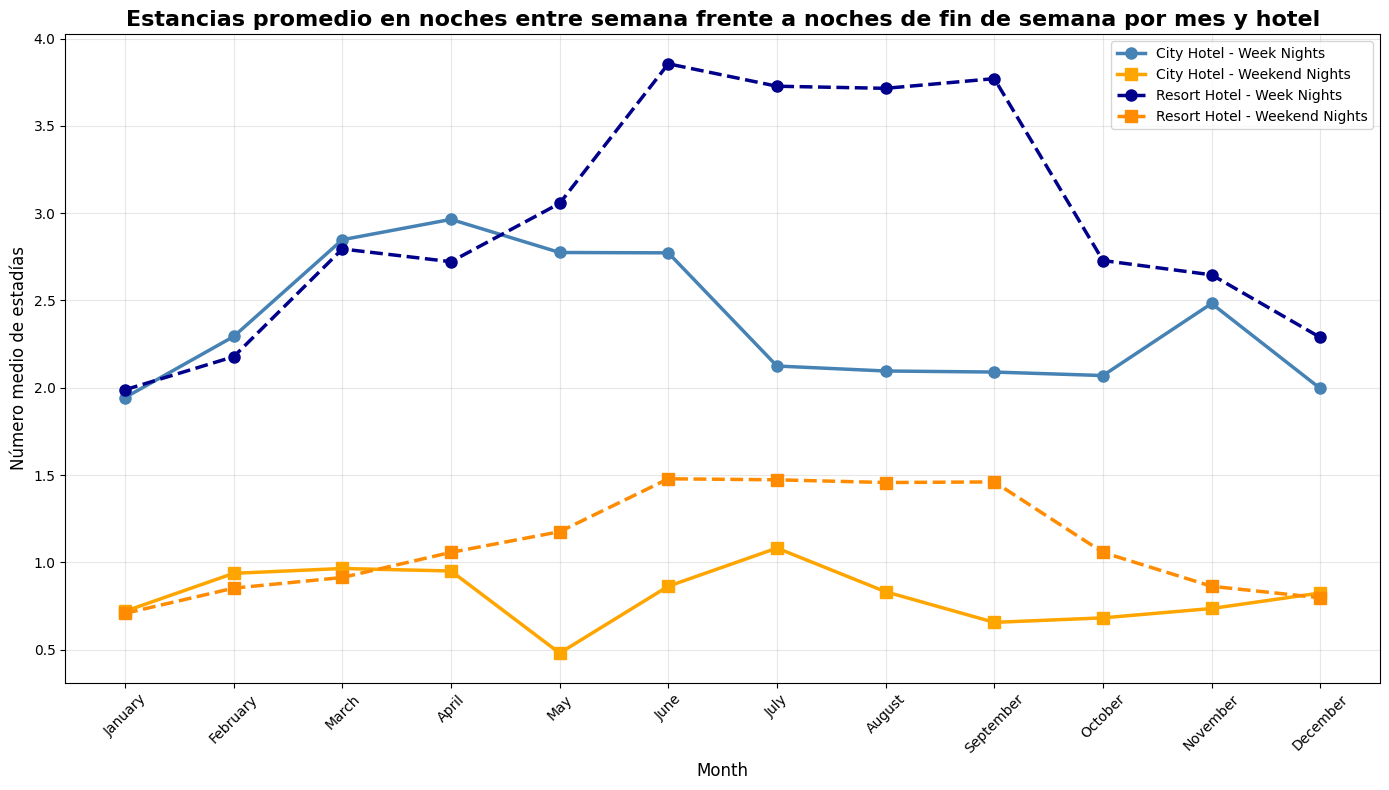

In [ ]:
# Promedio de estadía por mes en cada hotel
plt.figure(figsize=(14, 8))

# Divide la data de City Hotel y Resort Hotel
city_stays = stays_by_month_hotel_ordered[stays_by_month_hotel_ordered['hotel'] == 'City Hotel']
resort_stays = stays_by_month_hotel_ordered[stays_by_month_hotel_ordered['hotel'] == 'Resort Hotel']

# Plot for City Hotel
plt.plot(city_stays['arrival_date_month'], city_stays['stays_in_week_nights'], 'o-', linewidth=2.5,
         markersize=8, label='City Hotel - Week Nights', color='steelblue')
plt.plot(city_stays['arrival_date_month'], city_stays['stays_in_weekend_nights'], 's-', linewidth=2.5,
         markersize=8, label='City Hotel - Weekend Nights', color='orange')

# Plot for Resort Hotel
plt.plot(resort_stays['arrival_date_month'], resort_stays['stays_in_week_nights'], 'o--', linewidth=2.5,
         markersize=8, label='Resort Hotel - Week Nights', color='darkblue')
plt.plot(resort_stays['arrival_date_month'], resort_stays['stays_in_weekend_nights'], 's--', linewidth=2.5,
         markersize=8, label='Resort Hotel - Weekend Nights', color='darkorange')


plt.title('Estancias promedio en noches entre semana frente a noches de fin de semana por mes y hotel',
          fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Número medio de estadías', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las estancias promedio por noches entre semana y fines de semana a lo largo del año sugiere una tendencia de estadías más largas en hoteles resort vs las visualizadas para hoteles de ciudad.
Sin embargo, las estadías en noches de fin de semana son muy exporádicas en los hoteles de ciudad, lo que evidencia una tendencia a una alta vacancia en el 80% del año.

In [ ]:
# Create a 'total_guests' column if it doesn't exist
if 'total_guests' not in hotel_df.columns:
    hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

# Filter for canceled bookings and discard rows where total_guests is less than 0
canceled_bookings_filtered = hotel_df[(hotel_df['is_canceled'] == True) & (hotel_df['total_guests'] >= 0)].copy()

# Group by month, hotel, and total guests and calculate the mean of stays
stays_summary_canceled = canceled_bookings_filtered.groupby(['arrival_date_month', 'hotel', 'total_guests'])[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().reset_index()

# Create a MultiIndex for reindexing
multiindex = pd.MultiIndex.from_product([valid_months, stays_summary_canceled['hotel'].unique(), sorted(stays_summary_canceled['total_guests'].unique())], names=['arrival_date_month', 'hotel', 'total_guests'])

# Set index and reindex
stays_summary_canceled_ordered = stays_summary_canceled.set_index(['arrival_date_month', 'hotel', 'total_guests']).reindex(multiindex).reset_index()


print("Average stays in week nights and weekend nights for canceled bookings by month, hotel, and total guests:")
display(stays_summary_canceled_ordered)

Average stays in week nights and weekend nights for canceled bookings by month, hotel, and total guests:


,arrival_date_month,hotel,total_guests,stays_in_week_nights,stays_in_weekend_nights
0,January,City Hotel,0,<NA>,<NA>
1,January,City Hotel,1,3.888889,1.033333
2,January,City Hotel,2,2.2,1.2875
3,January,City Hotel,3,1.0,1.333333
4,January,City Hotel,4,3.714286,0.857143
...,...,...,...,...,...
1147,December,Resort Hotel,95,<NA>,<NA>
1148,December,Resort Hotel,96,<NA>,<NA>
1149,December,Resort Hotel,98,<NA>,<NA>
1150,December,Resort Hotel,99,<NA>,<NA>


In [ ]:
# Identify the most frequent total guest counts in canceled bookings for each hotel type

# Create 'total_guests' column if it doesn't exist
if 'total_guests' not in hotel_df.columns:
    hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

# Filter for canceled bookings and discard rows where total_guests is less than 0
canceled_bookings = hotel_df[(hotel_df['is_canceled'] == True) & (hotel_df['total_guests'] >= 0)].copy()

# Group by hotel and total_guests and count the occurrences
guest_counts_by_hotel = canceled_bookings.groupby(['hotel', 'total_guests']).size().reset_index(name='count')

# Find the most frequent guest counts for each hotel type
most_frequent_city = guest_counts_by_hotel[guest_counts_by_hotel['hotel'] == 'City Hotel'].nlargest(5, 'count')
most_frequent_resort = guest_counts_by_hotel[guest_counts_by_hotel['hotel'] == 'Resort Hotel'].nlargest(5, 'count')

# Get the list of most frequent guests
most_frequent_guests = guest_counts_by_hotel.nlargest(5, 'count')['total_guests'].tolist()


print("Most frequent total guest counts in canceled City Hotel bookings:")
display(most_frequent_city)

print("\nMost frequent total guest counts in canceled Resort Hotel bookings:")
display(most_frequent_resort)

print("\nOverall most frequent total guest counts in canceled bookings:")
print(most_frequent_guests)

Most frequent total guest counts in canceled City Hotel bookings:


,hotel,total_guests,count
2,City Hotel,2,9326
1,City Hotel,1,2302
3,City Hotel,3,1077
4,City Hotel,4,311
0,City Hotel,0,9



Most frequent total guest counts in canceled Resort Hotel bookings:


,hotel,total_guests,count
37,Resort Hotel,2,8299
36,Resort Hotel,1,1196
39,Resort Hotel,4,938
38,Resort Hotel,3,611
40,Resort Hotel,5,11



Overall most frequent total guest counts in canceled bookings:
[2, 2, 1, 1, 3]


In [ ]:
# Filtrar la tabla resumen ordenada por el número de huéspedes más frecuentes
stays_summary_canceled_filtered_guests = stays_summary_canceled_ordered[
    stays_summary_canceled_ordered['total_guests'].isin(most_frequent_guests)
].copy()

# Separate data by hotel type
city_canceled_stays = stays_summary_canceled_filtered_guests[stays_summary_canceled_filtered_guests['hotel'] == 'City Hotel']
resort_canceled_stays = stays_summary_canceled_filtered_guests[stays_summary_canceled_filtered_guests['hotel'] == 'Resort Hotel']

In [ ]:
# Identificar el número total de huéspedes más frecuente en las reservas canceladas para cada tipo de hotel

# Create 'total_guests' column if it doesn't exist
if 'total_guests' not in hotel_df.columns:
    hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

# Filter for canceled bookings and discard rows where total_guests is less than 0
canceled_bookings = hotel_df[(hotel_df['is_canceled'] == True) & (hotel_df['total_guests'] >= 0)].copy()

# Group by hotel and total_guests and count the occurrences
guest_counts_by_hotel = canceled_bookings.groupby(['hotel', 'total_guests']).size().reset_index(name='count')

# Find the most frequent guest counts for each hotel type
most_frequent_city = guest_counts_by_hotel[guest_counts_by_hotel['hotel'] == 'City Hotel'].nlargest(5, 'count')
most_frequent_resort = guest_counts_by_hotel[guest_counts_by_hotel['hotel'] == 'Resort Hotel'].nlargest(5, 'count')

# Get the list of most frequent guests
most_frequent_guests = guest_counts_by_hotel.nlargest(5, 'count')['total_guests'].tolist()


print("Most frequent total guest counts in canceled City Hotel bookings:")
display(most_frequent_city)

print("\nMost frequent total guest counts in canceled Resort Hotel bookings:")
display(most_frequent_resort)

print("\nOverall most frequent total guest counts in canceled bookings:")
print(most_frequent_guests)

Most frequent total guest counts in canceled City Hotel bookings:


,hotel,total_guests,count
2,City Hotel,2,9326
1,City Hotel,1,2302
3,City Hotel,3,1077
4,City Hotel,4,311
0,City Hotel,0,9



Most frequent total guest counts in canceled Resort Hotel bookings:


,hotel,total_guests,count
37,Resort Hotel,2,8299
36,Resort Hotel,1,1196
39,Resort Hotel,4,938
38,Resort Hotel,3,611
40,Resort Hotel,5,11



Overall most frequent total guest counts in canceled bookings:
[2, 2, 1, 1, 3]


In [ ]:
# Filter the ordered summary table for the most frequent guest counts
stays_summary_canceled_filtered_guests = stays_summary_canceled_ordered[
    stays_summary_canceled_ordered['total_guests'].isin(most_frequent_guests)
].copy()

# Separate data by hotel type
city_canceled_stays = stays_summary_canceled_filtered_guests[stays_summary_canceled_filtered_guests['hotel'] == 'City Hotel']
resort_canceled_stays = stays_summary_canceled_filtered_guests[stays_summary_canceled_filtered_guests['hotel'] == 'Resort Hotel']

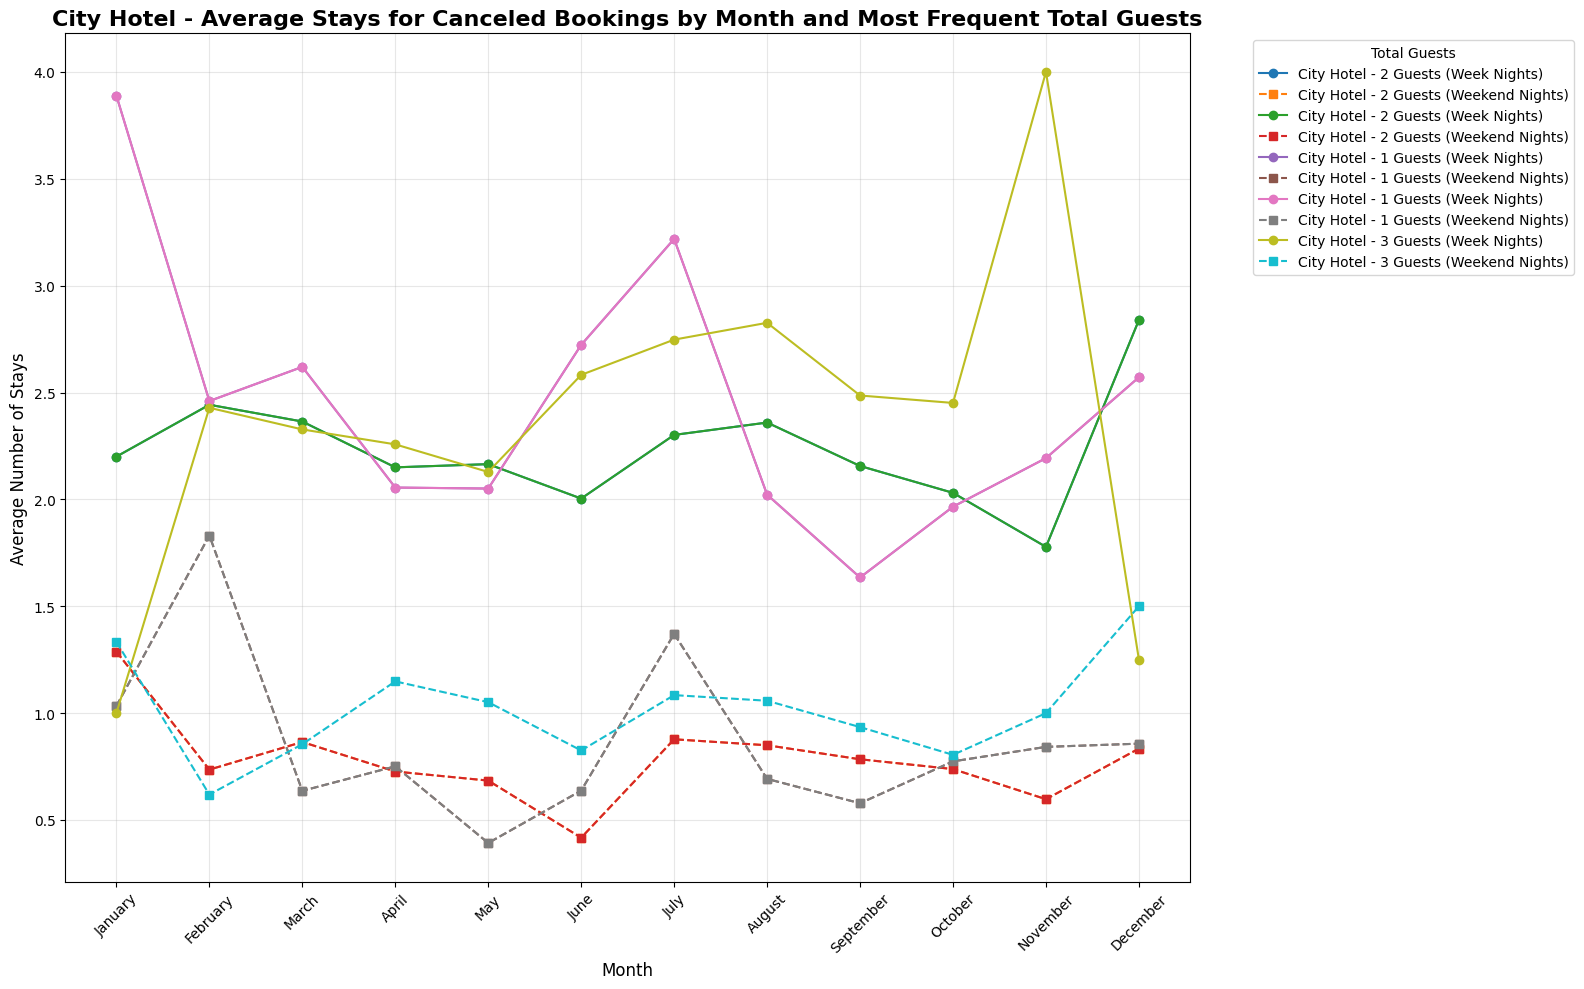

In [ ]:
# Plotting for City Hotel
plt.figure(figsize=(16, 10))
for guest_count in most_frequent_guests:
    guest_data = city_canceled_stays[city_canceled_stays['total_guests'] == guest_count].set_index('arrival_date_month').reindex(valid_months)
    if not guest_data.isnull().all(axis=1).all(): # Only plot if there is data for this guest count
         plt.plot(valid_months, guest_data['stays_in_week_nights'], 'o-', label=f'City Hotel - {guest_count} Guests (Week Nights)')
         plt.plot(valid_months, guest_data['stays_in_weekend_nights'], 's--', label=f'City Hotel - {guest_count} Guests (Weekend Nights)')


plt.title('City Hotel - Average Stays for Canceled Bookings by Month and Most Frequent Total Guests', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Stays', fontsize=12)
plt.legend(title='Total Guests', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de reservas en hoteles de ciudad revela patrones consistentes que evidencian oportunidades no capitalizadas en la estrategia comercial actual.
Hallazgos clave:
- Las cancelaciones se concentran en reservas individuales de 1 a 3 huéspedes, lo que sugiere baja fidelización y escaso compromiso en segmentos de corta estadía.
- Las estadías entre semana superan los 2 días en promedio, con una tendencia ocasional a extenderse al fin de semana.
- Este comportamiento indica una base de demanda corporativa o profesional, con potencial de conversión hacia estadías mixtas (laborales y ocio).


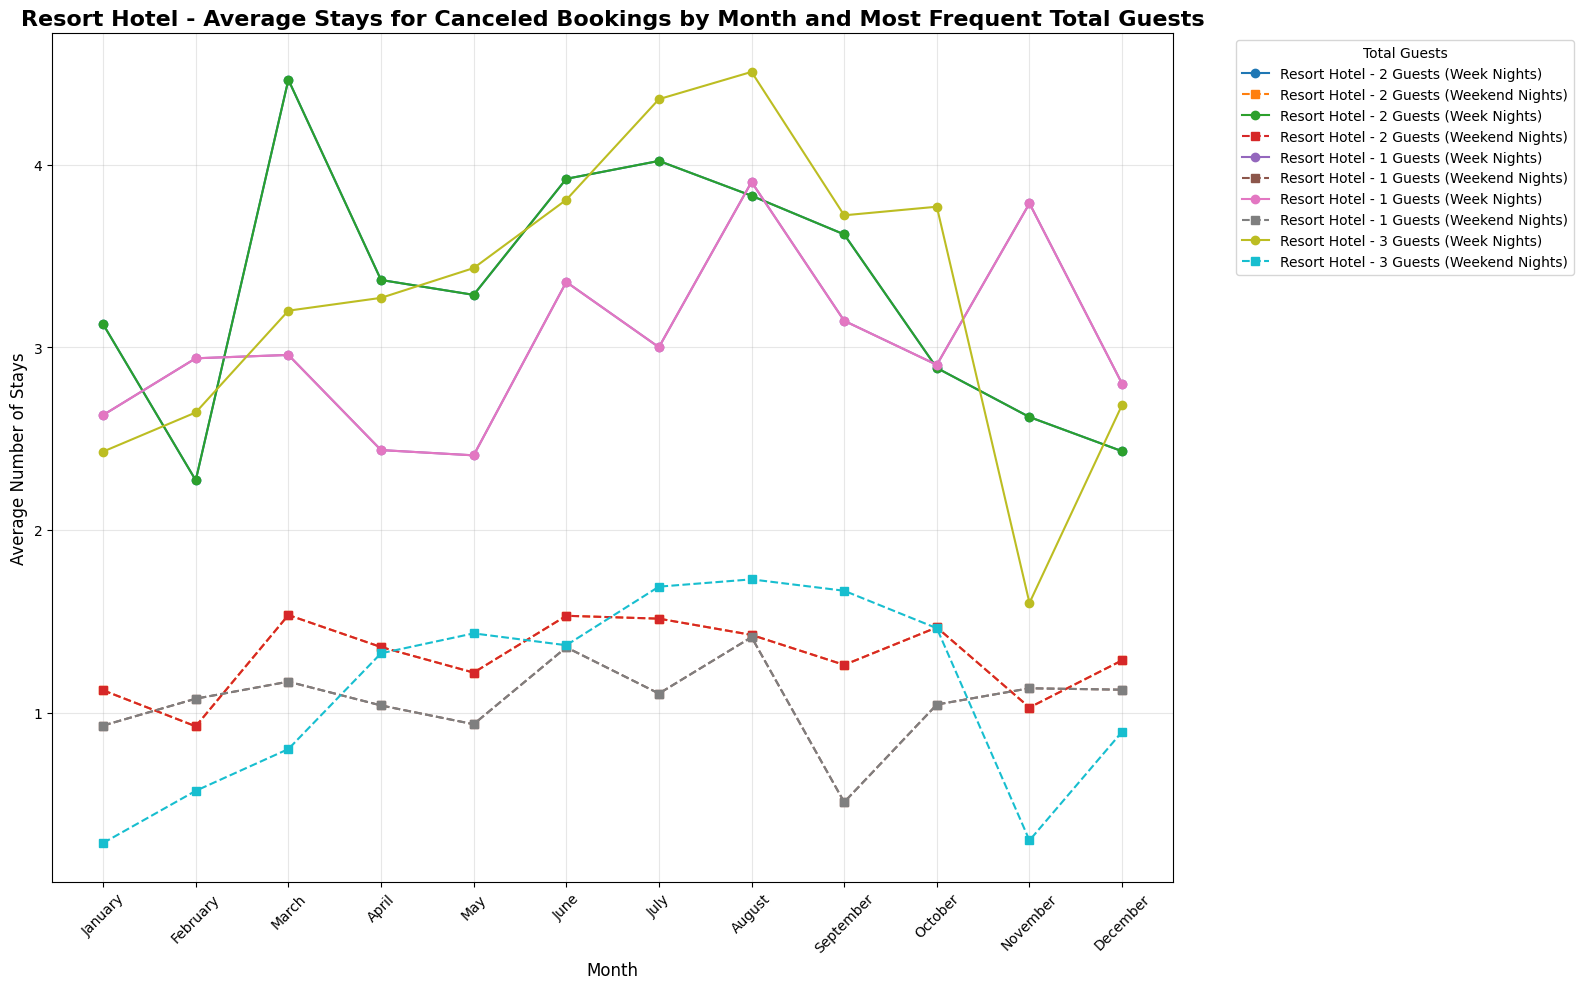

In [ ]:
# Plotting for Resort Hotel
plt.figure(figsize=(16, 10))
for guest_count in most_frequent_guests:
    guest_data = resort_canceled_stays[resort_canceled_stays['total_guests'] == guest_count].set_index('arrival_date_month').reindex(valid_months)
    if not guest_data.isnull().all(axis=1).all(): # Only plot if there is data for this guest count
        plt.plot(valid_months, guest_data['stays_in_week_nights'], 'o-', label=f'Resort Hotel - {guest_count} Guests (Week Nights)')
        plt.plot(valid_months, guest_data['stays_in_weekend_nights'], 's--', label=f'Resort Hotel - {guest_count} Guests (Weekend Nights)')


plt.title('Resort Hotel - Average Stays for Canceled Bookings by Month and Most Frequent Total Guests', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Stays', fontsize=12)
plt.legend(title='Total Guests', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En hoteles tipo resort, el promedio de estadía se sitúa entre 2 y 3 días, lo que genera ciclos de rotación rápida y una alta dependencia de la demanda puntual. Esta dinámica exige una estrategia proactiva para minimizar vacancia durante los meses de mayor afluencia.

**Hallazgos clave:**
- La corta duración promedio limita el margen de maniobra para compensar días vacíos.
- La ocupación en temporada alta se convierte en el principal motor de rentabilidad anual.
- La falta de planificación estratégica puede derivar en vacancia innecesaria, incluso en períodos de alta demanda.


## 3.6 Conclusiones

Del análisis se identifican varios hallazgos importantes. Las reservas hechas con mucha anticipación tienden a cancelarse con más frecuencia, lo que muestra que mientras más lejano es el viaje en el tiempo mayor es la probabilidad de desistimiento. También se confirma que el tipo de depósito juega un papel clave, ya que las reservas con condición de Non Refund son las que más se cancelan, incluso por encima de las que no tienen depósito.

Por otra parte, la demanda en hoteles resort es mucho más estable que la presentada en hoteles city, lo cual abre una oportunidad de mejora para incrementar la tasa de ocupación.
Los hoteles resort tienen una alta demanda entre Junio y Septiembre, coincidiendo con la temporada de verano, con un promedio de noches entre semana de 4 y de 1.5 para fines de semana. Por otra parte, los hoteles city tienen su punto más alto de demanda en el mes de Abril, con un promedio de estadía de 3 noches entre semana y una noche como máximo los fines de semana.


En cuanto al perfil de los clientes, los Transient son quienes más cancelan, mientras que los grupos y los clientes con contrato muestran un comportamiento mucho más estable. Algo parecido ocurre con los canales de distribución, ya que las reservas hechas a través de TA/TO y sobre todo de GDS presentan tasas de cancelación mucho más altas, mientras que las reservas directas o corporativas son más seguras. Por otro lado, la estacionalidad también influye: la tarifa diaria promedio y la proporción de cancelaciones suben y bajan a lo largo del año, con picos marcados en los meses de verano.

A partir de todo esto, se pueden plantear algunas recomendaciones. Por ejemplo, aplicar políticas de depósito más estrictas o escalonadas en reservas con mucha anticipación, incentivar los canales directos o corporativos con beneficios especiales, y ajustar la estrategia de precios en los meses de mayor demanda para compensar la mayor tasa de cancelación. Con estas medidas se puede reducir el riesgo de cancelaciones y al mismo tiempo mejorar la ocupación del hotel.

Para los hoteles city, replantear las opciones tarifarias para los meses donde los hoteles resort tengan mayor demanda, buscando que la ocupación de las habitaciones tenga una mejora y permita su sostenibilidad en el tiempo vs sus competidores.

Como dato adicional, proponer un piloto en hoteles city donde se incentive las estadías las noches de fines de semana con ofertas en las comidas incluídas o un upgrade de habitación en caso de haber disponibilidad.

## 3.6 Hypotesis

#### Hipotesis 1

##### Paso 0: Resumen inicial

In [ ]:
stats = h_df.groupby("is_canceled")["lead_time"].describe()
print("Resumen estadístico de lead_time por estado de cancelación:\n")
print(stats)

Resumen estadístico de lead_time por estado de cancelación:

               count        mean         std  min   25%    50%    75%    max
is_canceled                                                                 
False        32785.0   80.045265   91.468063  0.0   7.0   44.0  129.0  737.0
True         23151.0  129.533584  106.909466  0.0  43.0  102.0  191.0  605.0


Se calculan estadísticas descriptivas (media, desviación estándar, mínimo, máximo) del **lead time** para reservas canceladas y no canceladas, y se grafican las distribuciones.  
Esto permite observar tendencias iniciales: a simple vista, las reservas canceladas tienden a tener un lead time mayor.  


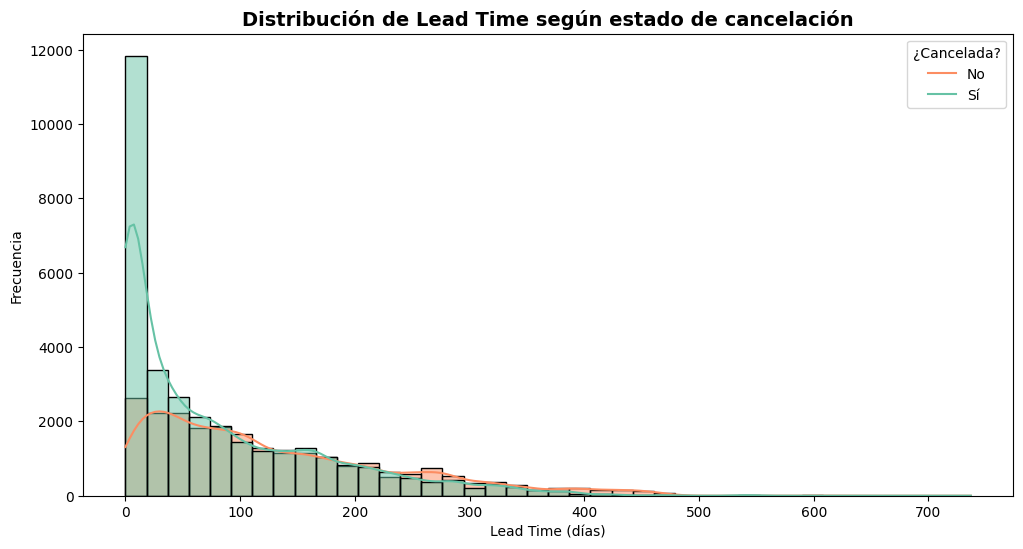

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=h_df, x="lead_time", hue="is_canceled", bins=40, kde=True, palette="Set2")
plt.title("Distribución de Lead Time según estado de cancelación", fontsize=14, fontweight="bold")
plt.xlabel("Lead Time (días)")
plt.ylabel("Frecuencia")
plt.legend(title="¿Cancelada?", labels=["No", "Sí"])
plt.show()

En la distribución visual, se observa una alta concentración de reservas con lead time cercano a 0 días (reservas hechas con muy poca anticipación), tanto en canceladas como en no canceladas. Sin embargo, a medida que aumenta el lead time, la proporción de reservas canceladas se incrementa de forma clara, lo que refuerza la hipótesis de que **reservas hechas con más tiempo de antelación tienen mayor probabilidad de cancelarse**.

##### Paso 1: Definir hipótesis


In [ ]:
print("\nHipótesis a probar:")
print("H0: El lead time promedio es igual en reservas canceladas y no canceladas")
print("H1: El lead time promedio es distinto en reservas canceladas y no canceladas")


Hipótesis a probar:
H0: El lead time promedio es igual en reservas canceladas y no canceladas
H1: El lead time promedio es distinto en reservas canceladas y no canceladas


##### Paso 2: Nivel de significancia

In [ ]:
alpha = 0.05
print(f"\nNivel de significancia elegido: α = {alpha}")


Nivel de significancia elegido: α = 0.05


##### Paso 3: p-value y tamaño del efecto

In [ ]:
# Separar los datos en dos grupos
lead_time_canceladas = h_df.loc[h_df['is_canceled'] == 1, 'lead_time']
lead_time_no_canceladas = h_df.loc[h_df['is_canceled'] == 0, 'lead_time']

# Prueba t de Welch
result = ttest_ind(lead_time_canceladas,
                         lead_time_no_canceladas,
                         equal_var=False)

print("\nResultados del t-test (Welch):")
print(f"t-statistic: {result.statistic:.3f}")
print(f"p-value: {result.pvalue:.5f}")



Resultados del t-test (Welch):
t-statistic: 57.187
p-value: 0.00000


Se aplica un **t-test** para comparar medias entre los dos grupos (canceladas y no canceladas), ya que las varianzas no necesariamente son iguales y el tamaño de muestra es grande.  

**Resultados del t-test:**  
- t-statistic: 57.187  
- p-value: ≈ 0.00000  

##### Paso 4 y 5: Prueba estadística e interpretación

In [ ]:
# Medias y tamaños de muestra
m1, m2 = lead_time_canceladas.mean(), lead_time_no_canceladas.mean()
s1, s2 = lead_time_canceladas.std(), lead_time_no_canceladas.std()
n1, n2 = len(lead_time_canceladas), len(lead_time_no_canceladas)

# Diferencia de medias
diff = m1 - m2

# Error estándar de la diferencia
se_diff = np.sqrt((s1**2/n1) + (s2**2/n2))

# Intervalo de confianza al 95%
ci_low = diff - 1.96*se_diff
ci_high = diff + 1.96*se_diff

print(f"\nDiferencia de medias: {diff:.3f}")
print(f"IC95% para la diferencia: [{ci_low:.3f}, {ci_high:.3f}]")

# Tamaño del efecto (Cohen's d)
sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
cohens_d = diff / sp
print(f"Cohen's d: {cohens_d:.3f}")

# Interpretación
if result.pvalue <= alpha:
    print("\n Se rechaza H0: Existe diferencia significativa en el lead time entre reservas canceladas y no canceladas")
else:
    print("\n No se rechaza H0: No hay evidencia suficiente para afirmar que los lead times sean diferentes")

if abs(cohens_d) < 0.2:
    efecto = "pequeño"
elif abs(cohens_d) < 0.5:
    efecto = "moderado"
else:
    efecto = "grande"

print(f" El tamaño del efecto es {efecto}")


Diferencia de medias: 49.488
IC95% para la diferencia: [47.792, 51.184]
Cohen's d: 0.504

 Se rechaza H0: Existe diferencia significativa en el lead time entre reservas canceladas y no canceladas
 El tamaño del efecto es grande


Dado que el **p-value < 0.05**, se **rechaza la hipótesis nula**.  
Existe evidencia estadísticamente significativa de que el lead time promedio de las reservas canceladas es diferente al de las reservas no canceladas.  

El análisis confirma que el tiempo de anticipación con el que se hace la reserva influye en la probabilidad de cancelación.  
En particular, **reservas con lead time más largo tienen mayor tendencia a cancelarse**.  
Este hallazgo puede orientar estrategias como aplicar políticas de depósito más estrictas o escalonadas en reservas hechas con mucha anticipación.

#### Hipotesis 2

##### Paso 0: Resumen inical

In [ ]:
contingency_table = pd.crosstab(h_df['distribution_channel'], h_df['is_canceled'])
print("Tabla de contingencia:")
print(contingency_table)

contingency_table_norm = pd.crosstab(h_df['distribution_channel'], h_df['is_canceled'], normalize='index')
print("\nProporciones por fila:")
print(contingency_table_norm)

Tabla de contingencia:
is_canceled           False  True 
distribution_channel              
Corporate              2409    916
Direct                 6614   1699
GDS                       1     10
TA/TO                 23761  20526

Proporciones por fila:
is_canceled              False     True 
distribution_channel                    
Corporate             0.724511  0.275489
Direct                0.795621  0.204379
GDS                   0.090909  0.909091
TA/TO                 0.536523  0.463477


Se construyó una tabla de contingencia entre el canal de distribución y el estado de cancelación.  
Además, se calcularon proporciones normalizadas por fila para entender qué porcentaje de reservas de cada canal termina cancelado.

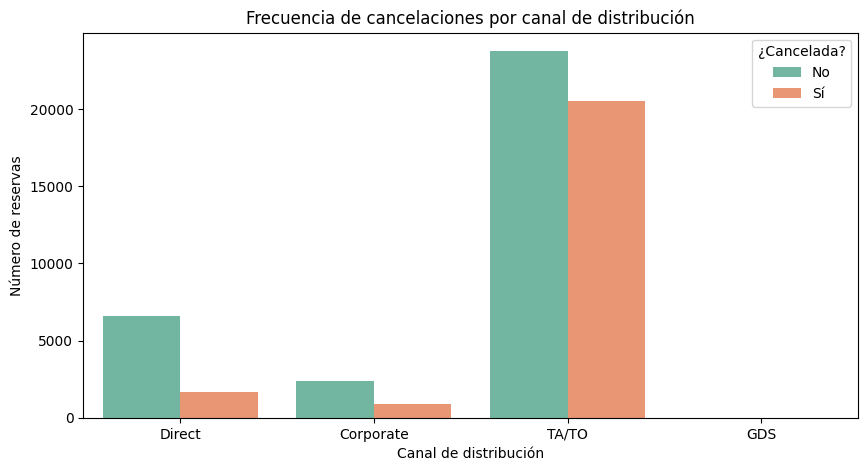

In [ ]:
# Gráfico 1: Frecuencia absoluta de cancelaciones por canal
plt.figure(figsize=(10,5))
sns.countplot(data=h_df, x='distribution_channel', hue='is_canceled', palette='Set2')
plt.title("Frecuencia de cancelaciones por canal de distribución")
plt.xlabel("Canal de distribución")
plt.ylabel("Número de reservas")
plt.legend(title="¿Cancelada?", labels=["No", "Sí"])
plt.show()



Este gráfico muestra el número total de reservas canceladas y no canceladas en cada canal.  
Se observa que el canal **TA/TO** concentra la mayor cantidad de reservas y también de cancelaciones, mientras que **Direct** y **Corporate** tienen volúmenes menores.  
El canal **GDS** es marginal, con muy pocas observaciones.

/tmp/ipython-input-4250895281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


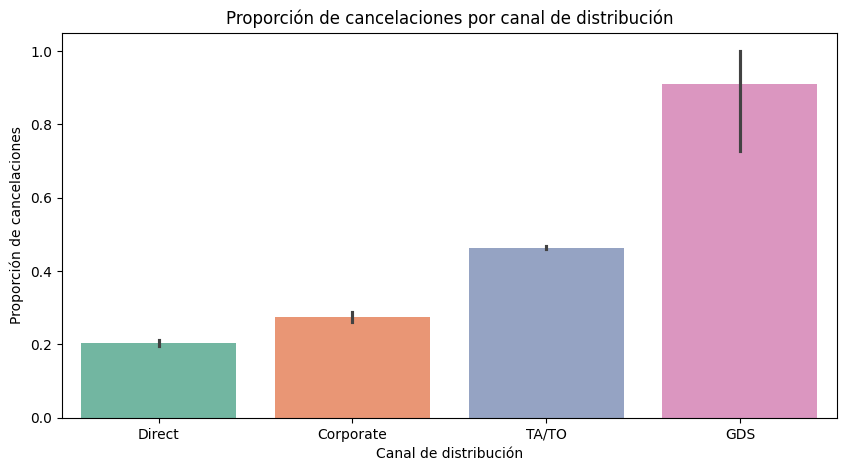

In [ ]:
# Gráfico 2: Proporción de cancelaciones por canal
plt.figure(figsize=(10,5))
sns.barplot(
    data=h_df,
    x='distribution_channel',
    y='is_canceled',
    estimator=lambda x: sum(x)/len(x),
    palette="Set2"
)
plt.title("Proporción de cancelaciones por canal de distribución")
plt.xlabel("Canal de distribución")
plt.ylabel("Proporción de cancelaciones")
plt.show()

Aquí se observa la **proporción relativa** de cancelaciones respecto al total de reservas de cada canal.  
El canal **GDS** tiene una proporción cercana al 100%, lo que indica un riesgo muy alto, aunque con pocos datos.  
En contraste, **Direct** y **Corporate** presentan las proporciones más bajas de cancelación, mientras que **TA/TO** se ubica en un punto intermedio.  

##### Paso 1: Definir hipótesis


In [ ]:
print("\nHipótesis a probar:")
print("H0: El canal de distribución y la cancelación son independientes.")
print("H1: Existe dependencia entre el canal de distribución y la cancelación.")


Hipótesis a probar:
H0: El canal de distribución y la cancelación son independientes.
H1: Existe dependencia entre el canal de distribución y la cancelación.


##### Paso 2: Nivel de significancia

In [ ]:
alpha = 0.05
print(f"\nNivel de significancia elegido: α = {alpha}")


Nivel de significancia elegido: α = 0.05


##### Paso 3: p-value y tamaño del efecto

In [ ]:
chi2, pvalue, dof, expected = chi2_contingency(contingency_table, correction=False)


n = contingency_table.values.sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

print(f"Chi2: {chi2:.4f}")
print(f"p-value: {pvalue:.6f}")
print(f"Cramer's V: {cramers_v:.3f}")

Chi2: 2226.7835
p-value: 0.000000
Cramer's V: 0.200


Se aplicó un **test Chi-cuadrado**.  
El resultado arrojó un estadístico elevado y un **p-value ≈ 0.00000**, indicando dependencia significativa.  
Además, se calculó el tamaño del efecto con **Cramér’s V = 0.20**, lo que sugiere una relación de magnitud **pequeña**.

##### Paso 4 y 5: Prueba estadística e interpretación

In [ ]:
if pvalue <= alpha:
    print(f"Se RECHAZA la hipótesis nula (p-value = {pvalue:.5f} <= {alpha}).")
    print("Existe evidencia estadísticamente significativa de que la cancelación de reservas depende del canal de distribución.")
else:
    print(f" No se puede rechazar la hipótesis nula (p-value = {pvalue:.5f} > {alpha}).")
    print("No hay evidencia suficiente para afirmar que la cancelación dependa del canal de distribución.")

# Evaluar magnitud del efecto (Cramér's V)
reference = [0.1, 0.3, 0.5]
magnitude = min(reference, key=lambda r: abs(r - cramers_v))

print(f"\nCramér's V = {cramers_v:.3f}")

if cramers_v < 0.1:
    print("Tamaño del efecto: Despreciable (la asociación es muy débil).")
elif cramers_v < 0.3:
    print("Tamaño del efecto: Pequeño.")
elif cramers_v < 0.5:
    print("Tamaño del efecto: Moderado.")
else:
    print("Tamaño del efecto: Grande.")

print("\nInterpretación final: Aunque el test indique dependencia significativa, el tamaño del efecto (Cramér's V) nos dice qué tan fuerte es esa relación en la práctica.")

Se RECHAZA la hipótesis nula (p-value = 0.00000 <= 0.05).
Existe evidencia estadísticamente significativa de que la cancelación de reservas depende del canal de distribución.

Cramér's V = 0.200
Tamaño del efecto: Pequeño.

Interpretación final: Aunque el test indique dependencia significativa, el tamaño del efecto (Cramér's V) nos dice qué tan fuerte es esa relación en la práctica.


Dado que el **p-value < 0.05**, se **rechaza la hipótesis nula**.  
Esto significa que **la probabilidad de cancelación depende del canal de distribución**.  

Sin embargo, el tamaño del efecto (**Cramér’s V = 0.20**) indica que el canal de distribución influye en las cancelaciones, pero no es el único factor relevante.  

#### Hipotesis 3

##### Paso 0: Reusemn inical

In [ ]:
stats = h_df.groupby("is_canceled")["adr"].describe()
print("Resumen estadístico de lead_time por estado de cancelación:\n")
print(stats)

Resumen estadístico de lead_time por estado de cancelación:

               count        mean        std  min     25%   50%    75%     max
is_canceled                                                                  
False        32785.0   90.516960  55.658068  0.0  53.250  75.0  112.0   508.0
True         23151.0  105.165876  61.862998  0.0  67.845  95.4  130.0  5400.0


Se calculan estadísticas descriptivas (media, desviación estándar, mínimo, máximo) del ADR para reservas canceladas y no canceladas, y se grafican las distribuciones.  

Esto permite observar tendencias iniciales: a simple vista, las reservas canceladas tienden a tener tarifas diarias promedio más altas.

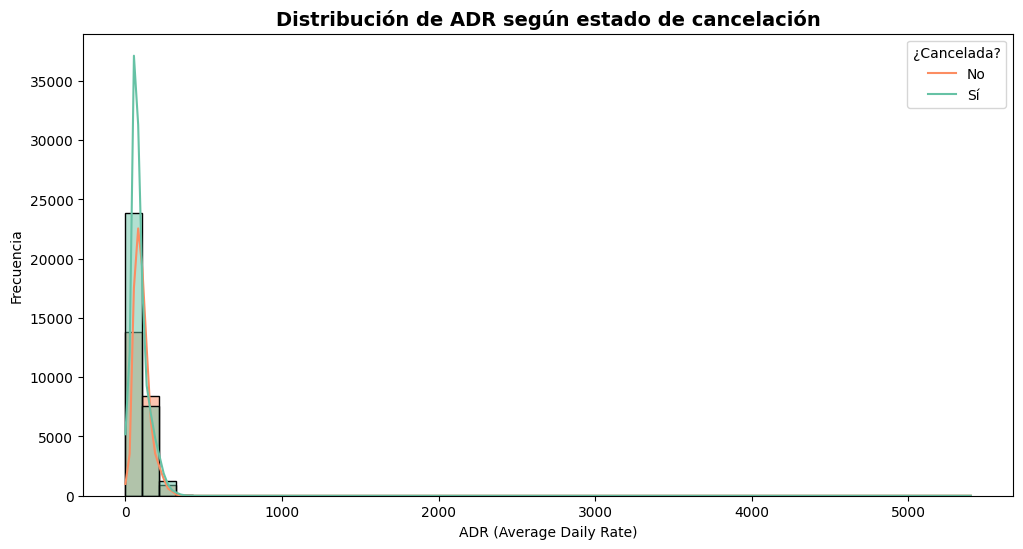

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=h_df, x="adr", hue="is_canceled", bins=50, kde=True, palette="Set2")
plt.title("Distribución de ADR según estado de cancelación", fontsize=14, fontweight="bold")
plt.xlabel("ADR (Average Daily Rate)")
plt.ylabel("Frecuencia")
plt.legend(title="¿Cancelada?", labels=["No", "Sí"])
plt.show()

Se grafican las distribuciones del ADR según el estado de cancelación.  

La visualización muestra cómo las reservas canceladas concentran más valores hacia ADR elevados en comparación con las reservas no canceladas, lo que sugiere una relación entre precio y probabilidad de cancelación.

##### Paso 1: Definir hipótesis


In [ ]:
print("\n### Paso 1: Hipótesis")
print("H0: El ADR promedio es igual en reservas canceladas y no canceladas")
print("H1: El ADR promedio es diferente en reservas canceladas y no canceladas")


### Paso 1: Hipótesis
H0: El ADR promedio es igual en reservas canceladas y no canceladas
H1: El ADR promedio es diferente en reservas canceladas y no canceladas


##### Paso 2: Nivel de significancia

In [ ]:
alpha = 0.05
print(f"\nNivel de significancia elegido: α = {alpha}")


Nivel de significancia elegido: α = 0.05


##### Paso 3: P-value y tamaño del efecto

In [ ]:
adr_canceladas = h_df.loc[h_df['is_canceled'] == 1, 'adr']
adr_no_canceladas = h_df.loc[h_df['is_canceled'] == 0, 'adr']

result = ttest_ind(adr_canceladas, adr_no_canceladas, equal_var=False)

print("\nResultados del t-test (Welch):")
print(f"t-statistic: {result.statistic:.3f}")
print(f"p-value: {result.pvalue:.5f}")


Resultados del t-test (Welch):
t-statistic: 28.740
p-value: 0.00000


Los resultados del t-test de Welch muestran un valor

**t = 28.740**
**p-value ≈ 0.00000**.  

Esto indica que la probabilidad de observar una diferencia tan grande en las medias de ADR entre los grupos, asumiendo que no hay diferencia real, es prácticamente nula.

##### Paso 4 y 5: Prueba estadística e interpretación

In [ ]:
m1, m2 = adr_canceladas.mean(), adr_no_canceladas.mean()
s1, s2 = adr_canceladas.std(), adr_no_canceladas.std()
n1, n2 = len(adr_canceladas), len(adr_no_canceladas)

# Diferencia de medias
diff = m1 - m2

# Error estándar de la diferencia
se_diff = np.sqrt((s1**2/n1) + (s2**2/n2))

# Intervalo de confianza 95%
ci_low = diff - 1.96*se_diff
ci_high = diff + 1.96*se_diff

# Tamaño del efecto (Cohen's d)
sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
cohens_d = diff / sp

print("\n### Paso 5: Interpretación")
if result.pvalue <= alpha:
    print(f"Se rechaza H0: Existe diferencia significativa en ADR entre reservas canceladas y no canceladas.")
else:
    print(f"No se rechaza H0: No hay evidencia suficiente para afirmar que ADR difiere entre canceladas y no canceladas.")

print(f"\nDiferencia de medias: {diff:.3f}")
print(f"IC95% de la diferencia: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Cohen's d: {cohens_d:.3f}")


### Paso 5: Interpretación
Se rechaza H0: Existe diferencia significativa en ADR entre reservas canceladas y no canceladas.

Diferencia de medias: 14.649
IC95% de la diferencia: [13.650, 15.648]
Cohen's d: 0.251


Dado que el **p-value < 0.05**, se **rechaza la hipótesis nula**.  
Existe evidencia estadísticamente significativa de que el ADR promedio de las reservas canceladas difiere del de las reservas no canceladas.  

En particular, las reservas canceladas presentan un **ADR más alto en promedio**.  
Esto sugiere que tarifas más elevadas están asociadas con mayor probabilidad de cancelación.  

El tamaño del efecto calculado con **Cohen's d ≈ 0.25** indica un efecto **pequeño pero relevante**, es decir, aunque la diferencia no es muy grande en magnitud, sí es consistente y significativa.  


### Hipótesis 4

#### Paso 0: Resumen inicial

In [ ]:
#Crear variable tiempo total estadía
hotel_df_h4 = hotel_df.copy()

# Select only the rows where 'is_canceled' is False and relevant columns
hotel_df_h4 = hotel_df_h4.loc[hotel_df_h4["is_canceled"] == False, ['stays_in_week_nights', 'stays_in_weekend_nights', 'hotel']]

# Calculate total stays
hotel_df_h4['total_stays'] = hotel_df_h4['stays_in_week_nights'] + hotel_df_h4['stays_in_weekend_nights']

In [ ]:
hotel_summary = hotel_df_h4.groupby('hotel')['total_stays'].describe()
print(hotel_summary)

                count      mean       std  min  25%  50%  75%   max
hotel                                                              
City Hotel     5727.0  2.977999  1.704262  0.0  2.0  3.0  4.0  48.0
Resort Hotel  28939.0  4.142783  3.374007  0.0  2.0  3.0  7.0  69.0


Se calculan estadísticas descriptivas (media, desviación estándar, mínimo, máximo) del número total de estadías para hotel Resort y City, y se grafican las distribuciones.

Esto permite observar tendencias iniciales: a simple vista, las estadías más largas suelen ser en hoteles tipo Resort.

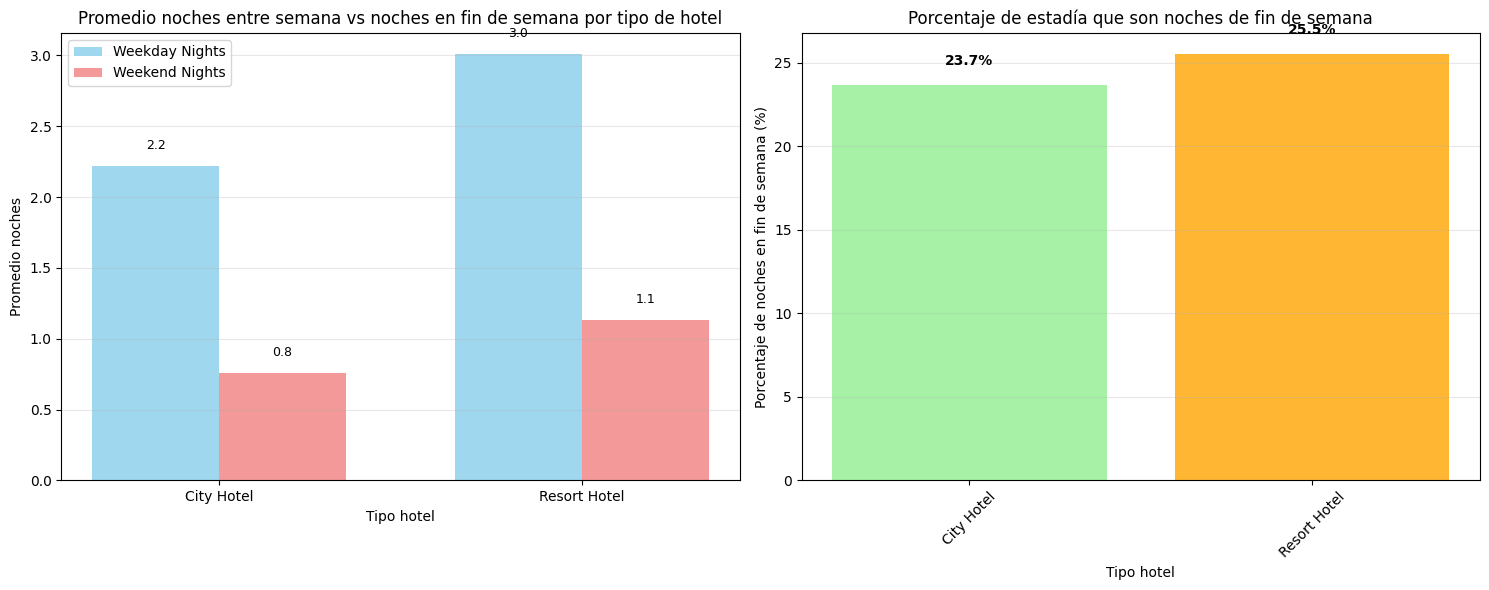

In [ ]:

# Avoid division by zero - only calculate ratios for rows with total_stays > 0
hotel_df_h4['weekend_ratio'] = hotel_df_h4.apply(
    lambda x: x['stays_in_weekend_nights'] / x['total_stays'] if x['total_stays'] > 0 else 0,
    axis=1
)
hotel_df_h4['weekday_ratio'] = hotel_df_h4.apply(
    lambda x: x['stays_in_week_nights'] / x['total_stays'] if x['total_stays'] > 0 else 0,
    axis=1
)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Media entre weekday vs weekend stays
weekday_means = hotel_df_h4.groupby('hotel')['stays_in_week_nights'].mean()
weekend_means = hotel_df_h4.groupby('hotel')['stays_in_weekend_nights'].mean()

x = np.arange(len(weekday_means.index))
width = 0.35

axes[0].bar(x - width/2, weekday_means.values, width, label='Weekday Nights', alpha=0.8, color='skyblue')
axes[0].bar(x + width/2, weekend_means.values, width, label='Weekend Nights', alpha=0.8, color='lightcoral')
axes[0].set_xlabel('Tipo hotel')
axes[0].set_ylabel('Promedio noches')
axes[0].set_title('Promedio noches entre semana vs noches en fin de semana por tipo de hotel')
axes[0].set_xticks(x)
axes[0].set_xticklabels(weekday_means.index)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Proporción de estancias de fin de semana
weekend_ratios = hotel_df_h4.groupby('hotel')['weekend_ratio'].mean()

axes[1].bar(weekend_ratios.index, weekend_ratios.values * 100, alpha=0.8, color=['lightgreen', 'orange'])
axes[1].set_xlabel('Tipo hotel')
axes[1].set_ylabel('Porcentaje de noches en fin de semana (%)')
axes[1].set_title('Porcentaje de estadía que son noches de fin de semana')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars for both plots
for i, (weekday, weekend) in enumerate(zip(weekday_means.values, weekend_means.values)):
    axes[0].text(i - width/2, weekday + 0.1, f'{weekday:.1f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, weekend + 0.1, f'{weekend:.1f}', ha='center', va='bottom', fontsize=9)

for i, v in enumerate(weekend_ratios.values * 100):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Se grafican las distribuciones de las estadías por tipo de hotel y su proporción de agendar nochs en fin de semana.

La visualización muestra cómo las reservas efectivas en hoteles resort mantienen un promedio de ocupación mpas alto entre semana, a comparación de los hoteles tipo City, donde es más baja la proporción de que la reserva incluya al menos una noche en fin de semana.

#### Paso 1: Definir hipótesis

In [ ]:
print("\n### Paso 1: Hipótesis")
print("H0: La estadía promedio en fin de semana es igual en reservas tipo resort que en tipo ciudad")
print("H1: La estadía promedio en fin de semana es diferente en reservas tipo resort que en tipo ciudad")


### Paso 1: Hipótesis
H0: La estadía promedio en fin de semana es igual en reservas tipo resort que en tipo ciudad
H1: La estadía promedio en fin de semana es diferente en reservas tipo resort que en tipo ciudad


#### Paso 2: Nivel de significancia

In [ ]:
alpha = 0.01
print(f"\nNivel de significancia elegido: α = {alpha}")


Nivel de significancia elegido: α = 0.01


#### Paso 3: P-value y tamaño del efecto

In [ ]:
#Cálculo de ratio de estadía en fines de semana por tipo de hotel
for hotel in hotel_df_h4['hotel'].unique():
        hotel_data = hotel_df_h4[hotel_df_h4['hotel'] == hotel]
        weekend_ratio = hotel_data['stays_in_weekend_nights'].sum() / hotel_data['total_stays'].sum()

In [ ]:
# T-test for weekend ratio difference
hotels = hotel_df_h4['hotel'].unique()
if len(hotels) == 2:
  ratio1 = hotel_df_h4[hotel_df_h4['hotel'] == hotels[0]]['weekend_ratio']
  ratio2 = hotel_df_h4[hotel_df_h4['hotel'] == hotels[1]]['weekend_ratio']
  t_stat, p_value = ttest_ind(ratio1, ratio2, equal_var=False)
  print(f"\nDiferencia en la proporción durante el fin de semana luego de aplicat t-test de Welch: \nt = {t_stat:.3f} \np = {p_value:.4f}")
if p_value < alpha:
  higher_hotel = hotels[0] if ratio1.mean() > ratio2.mean() else hotels[1]
  print(f"✓ {higher_hotel} tiene el mayor ratio de noches de estadía en fines de semana")


Diferencia en la proporción durante el fin de semana luego de aplicat t-test de Welch: 
t = 4.546 
p = 0.0000
✓ Resort Hotel tiene el mayor ratio de noches de estadía en fines de semana


#### Paso 4 y 5: Prueba estadística e interpretación

In [ ]:
# Enhanced analysis with means, std, and effect size
m1, m2 = ratio1.mean(), ratio2.mean()
s1, s2 = ratio1.std(), ratio2.std()
n1, n2 = len(ratio1), len(ratio2)

# Difference in means
diff = m1 - m2

# Standard error of the difference
se_diff = np.sqrt((s1**2/n1) + (s2**2/n2))

# 95% confidence interval
ci_low = diff - 1.96 * se_diff
ci_high = diff + 1.96 * se_diff

# Effect size (Cohen's d)
sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
cohens_d = diff / sp

# Print comprehensive results
print(f"\n### Paso 5: Interpretación: {hotels[0]} vs {hotels[1]}")
print(f"T-test: t = {t_stat:.3f}, p = {p_value:.4f}")

# Interpretation
if p_value <= alpha:
    higher_hotel = hotels[0] if m1 > m2 else hotels[1]
    print(f"✓ Se rechaza H0: {higher_hotel} tiene ratio de fin de semana significativamente mayor")
else:
    print(f"✗ No se rechaza H0: No hay diferencia significativa en ratio de fin de semana")
print(f"\nDiferencia de medias: {diff:.3f}")
print(f"IC95% de la diferencia: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Cohen's d: {cohens_d:.3f}")


### Paso 5: Interpretación: Resort Hotel vs City Hotel
T-test: t = 4.546, p = 0.0000
✓ Se rechaza H0: Resort Hotel tiene ratio de fin de semana significativamente mayor

Diferencia de medias: 0.018
IC95% de la diferencia: [0.011, 0.026]
Cohen's d: 0.068


### Hipótesis 5

#### Paso 0: Resumen Inicial

In [ ]:
# Valida que las variables de mes esten en el formato correcto para su análisis
hotel_df_h5 = hotel_df.copy()
hotel_df_h5=hotel_df_h5.loc[hotel_df_h5["is_canceled"] == False]
hotel_df_h5['arrival_date_month'] = hotel_df_h5['arrival_date_month'].astype(str)
hotel_df_h5['hotel'] = hotel_df_h5['hotel'].astype(str)

# Contar las reservas por mes y hotel
reservations_by_month_hotel = hotel_df_h5.groupby(['arrival_date_month', 'hotel'], observed=True).size().reset_index(name='reservation_count')

# Obtenga todos los meses y hoteles únicos
all_months = sorted(hotel_df_h5['arrival_date_month'].unique())
hotels = hotel_df_h5['hotel'].unique()


# Test for each hotel type
results = {}

In [ ]:
month_hotel_summary=hotel_df_h5.groupby('hotel')['arrival_date_month'].describe()
print(month_hotel_summary)

              count unique        top  freq
hotel                                      
City Hotel     5727     12  September  1465
Resort Hotel  28939     12     August  3257


Se calculan estadísticas descriptivas(count, top, freq) del número total de estadías efectivas por mes para hotel Resort y City, y se grafican las distribuciones.

Esto permite observar tendencias iniciales: a simple vista, La finalización de la temporada de verano es donde más reservaciones hay para cada uno de los hoteles.

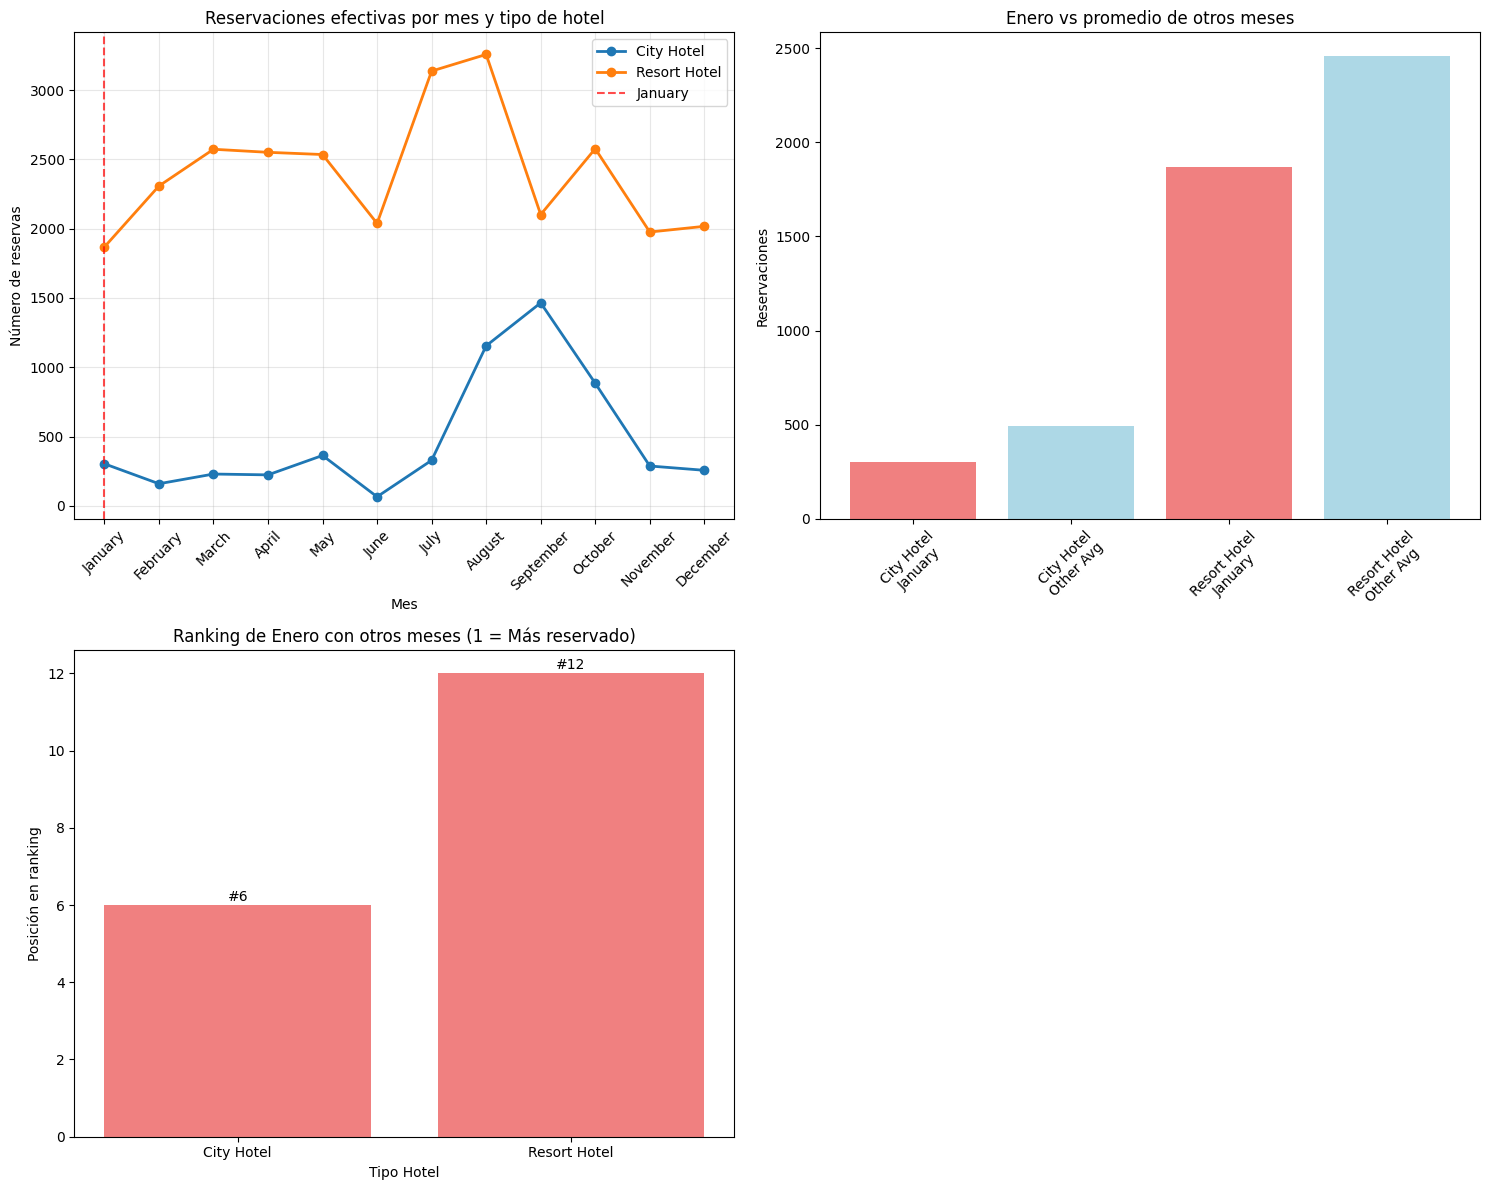

In [ ]:
# Pivot data for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

pivot_data = reservations_by_month_hotel.pivot(index='arrival_date_month', columns='hotel', values='reservation_count')
pivot_data = pivot_data.reindex(month_order)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gráfico de líneas por tipo de hotel
for hotel in pivot_data.columns:
    axes[0, 0].plot(pivot_data.index, pivot_data[hotel], marker='o', label=hotel, linewidth=2)
axes[0, 0].axvline('January', color='red', linestyle='--', alpha=0.7, label='January')
axes[0, 0].set_title('Reservaciones efectivas por mes y tipo de hotel')
axes[0, 0].set_ylabel('Número de reservas')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Diagrama de barras comparando Enero con la media de los demás meses
january_vs_avg = []
hotels = []
for hotel in pivot_data.columns:
    january_val = pivot_data.loc['January', hotel]
    other_avg = pivot_data.drop('January').mean()[hotel]
    january_vs_avg.extend([january_val, other_avg])
    hotels.extend([f'{hotel}\nJanuary', f'{hotel}\nOther Avg'])

axes[0, 1].bar(range(len(january_vs_avg)), january_vs_avg, color=['lightcoral', 'lightblue'] * len(pivot_data.columns))
axes[0, 1].set_title('Enero vs promedio de otros meses')
axes[0, 1].set_ylabel('Reservaciones')
axes[0, 1].set_xticks(range(len(january_vs_avg)))
axes[0, 1].set_xticklabels(hotels, rotation=45)

# 3. Análisis de ranking (Para Enero)
january_ranks = {}
for hotel in pivot_data.columns:
    ranked = pivot_data[hotel].rank(ascending=False)
    january_ranks[hotel] = ranked['January']

axes[1, 0].bar(january_ranks.keys(), january_ranks.values(), color='lightcoral')
axes[1, 0].set_title('Ranking de Enero con otros meses (1 = Más reservado)')
axes[1, 0].set_ylabel('Posición en ranking')
axes[1, 0].set_xlabel('Tipo Hotel')
for i, (hotel, rank) in enumerate(january_ranks.items()):
    axes[1, 0].text(i, rank + 0.1, f'#{int(rank)}', ha='center')

# Hide unused subplot (bottom right)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

Se grafican las distribuciones de las estadías efectivas por mes y tipo de hotel y su media vs otros meses del año.

La visualización muestra cómo las reservas efectivas en hoteles resort mantienen un promedio de ocupación más estable durante el año, a comparación de los hoteles tipo City, donde las reservas son menores a 500 el 75% de los meses del año.

#### Paso 1: Definir hipótesis

In [ ]:
print("\n### Paso 1: Hipótesis")
print("H0: Enero es el mes con menos reservas efectivas tanto en hotel tipo resort como en tipo ciudad")
print("H1: Enero no es el mes con menos reservas efectivas tanto en hotel tipo resort como en tipo ciudad")


### Paso 1: Hipótesis
H0: Enero es el mes con menos reservas efectivas tanto en hotel tipo resort como en tipo ciudad
H1: Enero no es el mes con menos reservas efectivas tanto en hotel tipo resort como en tipo ciudad


#### Paso 2: Nivel de significancia

In [ ]:
alpha = 0.01
print(f"\nNivel de significancia elegido: α = {alpha}")


Nivel de significancia elegido: α = 0.01


#### Paso 3, 4 y 5: p-value, tamaño del efecto, prueba estadística e interpretación

In [ ]:
def test_january_minimum_reservations(df, alpha):
    """Comprueba la hipótesis de que enero es el mes con menos reservas en ambos tipos de hoteles."""

    print("PRUEBA DE HIPÓTESIS: Enero es el mes con menos reservas en ambos tipos de hoteles")
    print("=" * 70)

    # Convert month to string for compatibility
    df = df.copy()
    df['arrival_date_month'] = df['arrival_date_month'].astype(str)
    df['hotel'] = df['hotel'].astype(str)

    # Count reservations by month and hotel
    reservations_by_month_hotel = df.groupby(['arrival_date_month', 'hotel'], observed=True).size().reset_index(name='reservation_count')

    # Get all unique months and hotels
    all_months = sorted(df['arrival_date_month'].unique())
    hotels = df['hotel'].unique()


    # Prueba por cada tipo de hotel
    results = {}

    for hotel in hotels:
        print(f"\n{'='*50}")
        print(f"ANALISIS PARA {hotel.upper()}")
        print(f"{'='*50}")

        hotel_data = reservations_by_month_hotel[reservations_by_month_hotel['hotel'] == hotel]

        # Get January data
        january_data = hotel_data[hotel_data['arrival_date_month'] == 'January']
        if len(january_data) == 0:
            print(f"✗ No se han encontrado datos de enero para {hotel}")
            continue

        january_count = january_data['reservation_count'].values[0]

        # Get all other months' data
        other_months_data = hotel_data[hotel_data['arrival_date_month'] != 'January']

        # Test 1: Is January significantly lower than all other months?
        print(f"Reservaciones en Enero: {january_count:,}")
        print(f"Rango para otros meses: {other_months_data['reservation_count'].min():,} - {other_months_data['reservation_count'].max():,}")

        # Perform one-sample t-test: January vs all other months
        t_stat, p_value = ttest_1samp(other_months_data['reservation_count'], january_count)

        # Since we're testing if January is lower, we use one-tailed test
        one_tailed_p = p_value / 2 if t_stat > 0 else (1 - p_value/2)

        print(f"\n1. ONE-SAMPLE T-TEST (Enero vs otros meses):")
        print(f"   t-statistic: {t_stat:.3f}")
        print(f"   p-value (one-tailed): {one_tailed_p:.6f}")

        if one_tailed_p < alpha:
            print(f"   ✓ SIGNIFICATIVO: Enero tiene significativamente menos reservas que otros meses (p < {alpha})")
        else:
            print(f"   ✗ NO SIGNIFICATIVO: No hay pruebas de que en enero haya menos reservas (p = {one_tailed_p:.4f})")

        # Test 2: ¿Es Enero el mínimo absoluto en reservas?
        actual_min = other_months_data['reservation_count'].min()
        is_absolute_min = january_count < actual_min

        print(f"\n2. Validación de mínimo absoluto")
        print(f"   January count: {january_count:,}")
        print(f"   Actual minimum from other months: {actual_min:,}")

        if is_absolute_min:
            print(f"   ✓ CONFIRMADO: Enero tiene el mínimo absoluto de reservas.")
        else:
            print(f"   ✗ RECHAZADO: {other_months_data[other_months_data['reservation_count'] == actual_min]['arrival_date_month'].values[0]} has fewer reservations ({actual_min:,})")

        # Test 3: Comparación de Enero con cada mes
        print(f"\n3. COMPARACIONES POR PARES (Enero vs cada mes):")
        pairwise_results = []

        for month in other_months_data['arrival_date_month'].unique():
            month_data = other_months_data[other_months_data['arrival_date_month'] == month]
            month_count = month_data['reservation_count'].values[0]

            # Prueba de proporción simple
            if january_count < month_count:
                result = "✓ Menor"
                significant = True
            else:
                result = "✗ Mayor o igual"
                significant = False

            pairwise_results.append((month, month_count, january_count < month_count, significant))
            print(f"   vs {month:12}: {month_count:6,} → {result}")

        # Cálculo de tasa de éxito
        success_count = sum(1 for _, _, is_lower, _ in pairwise_results if is_lower)
        total_comparisons = len(pairwise_results)
        success_rate = success_count / total_comparisons

        print(f"\n   Tasa de éxito: {success_count}/{total_comparisons} ({success_rate:.1%}) de los meses tienen más reservas que Enero")

        m1 = other_months_data['reservation_count'].mean()  # Other months mean
        m2 = january_count                                  # January mean (single value)
        s1 = other_months_data['reservation_count'].std()   # Other months std
        n1 = len(other_months_data)                         # Other months sample size
        n2 = 1                                              # January sample size (single month)


        # Compare enero con la media de los demás meses utilizando one-sample t-test
        t_stat, p_value = ttest_1samp(other_months_data['reservation_count'], m2)
        one_tailed_p = p_value / 2 if m1 > m2 else (1 - p_value / 2)

        # Enfoque 2: Calcular el tamaño del efecto utilizando la desviación estándar combinada.
        # Para la comparación de valores únicos, utilizamos la desviación estándar de otros meses como estimado
        sp = s1  # Utilizar la desviación estándar de otros meses como estimación de la desviación estándar agrupada
        cohens_d = (m1 - m2) / sp if sp > 0 else 0

        # Error estándar e intervalo de confianza
        se_diff = s1 / np.sqrt(n1)  # Error estándar de la diferencia
        diff = m1 - m2
        ci_low = diff - 1.96 * se_diff
        ci_high = diff + 1.96 * se_diff

        # Impresión de resultados
        print(f"Enero: {m2:,.0f} reservaciones")
        print(f"Otros meses: {m1:,.0f} ± {s1:,.0f} (media ± DE)")
        print(f"Diferencia: {diff:,.0f} reservaciones")
        print(f"T-test: t = {t_stat:.3f}, p = {one_tailed_p:.6f}")
        print(f"IC95% de la diferencia: [{ci_low:,.0f}, {ci_high:,.0f}]")
        print(f"Cohen's d: {cohens_d:.3f}")

        # Interpretation
        print(f"\n### Interpretación: Enero vs Otros Meses en {hotel}")
        if one_tailed_p <= alpha:
          print(f"✓ Se rechaza H0: Enero tiene significativamente menos reservaciones (p = {one_tailed_p:.6f})")
          if cohens_d >= 0.8:
            print(f"✓ Tamaño del efecto GRANDE (d = {cohens_d:.3f})")
          elif cohens_d >= 0.5:
            print(f"✓ Tamaño del efecto MEDIANO (d = {cohens_d:.3f})")
          elif cohens_d >= 0.2:
            print(f"✓ Tamaño del efecto PEQUEÑO (d = {cohens_d:.3f})")
          else:
            print(f"✓ Tamaño del efecto MÍNIMO (d = {cohens_d:.3f})")
        else:
          print(f"✗ No se rechaza H0: No hay diferencia significativa (p = {one_tailed_p:.4f})")

        # Store results
        results[hotel] = {
            'january_count': january_count,
            'other_months_stats': {
                'mean': other_months_data['reservation_count'].mean(),
                'min': other_months_data['reservation_count'].min(),
                'max': other_months_data['reservation_count'].max()
            },
            't_test': {'stat': t_stat, 'p_value': one_tailed_p, 'significant': one_tailed_p < alpha},
            'absolute_min': is_absolute_min,
            'pairwise_success_rate': success_rate,
            'all_pairwise_success': success_count == total_comparisons
        }

    return results, reservations_by_month_hotel



In [ ]:
# Correr el test de la hipótesis
january_results, reservation_data = test_january_minimum_reservations(hotel_df_h5,alpha)

PRUEBA DE HIPÓTESIS: Enero es el mes con menos reservas en ambos tipos de hoteles

ANALISIS PARA RESORT HOTEL
Reservaciones en Enero: 1,868
Rango para otros meses: 1,976 - 3,257

1. ONE-SAMPLE T-TEST (Enero vs otros meses):
   t-statistic: 4.519
   p-value (one-tailed): 0.000555
   ✓ SIGNIFICATIVO: Enero tiene significativamente menos reservas que otros meses (p < 0.01)

2. Validación de mínimo absoluto
   January count: 1,868
   Actual minimum from other months: 1,976
   ✓ CONFIRMADO: Enero tiene el mínimo absoluto de reservas.

3. COMPARACIONES POR PARES (Enero vs cada mes):
   vs April       :  2,551 → ✓ Menor
   vs August      :  3,257 → ✓ Menor
   vs December    :  2,017 → ✓ Menor
   vs February    :  2,308 → ✓ Menor
   vs July        :  3,137 → ✓ Menor
   vs June        :  2,038 → ✓ Menor
   vs March       :  2,573 → ✓ Menor
   vs May         :  2,535 → ✓ Menor
   vs November    :  1,976 → ✓ Menor
   vs October     :  2,577 → ✓ Menor
   vs September   :  2,102 → ✓ Menor

   Tasa 

Pese a que los hoteles resort cumplen con la hipótesis de que Enero es el menor mes de reservas efectivas, en los hoteles City sucede en el mes de Junio, lo cual evidencia que la ocupación de los hoteles City no es la óptima para mantener la sostenibilidad financiera con el tiempo, al no haber una tendencia donde se incremente su demanda durante el año.

## 3.7 Insights

### Insight 1: Lead time y cancelaciones

Las reservas hechas con mucha anticipación tienen una probabilidad significativamente mayor de cancelarse.  

Se recomendaria implementar políticas de depósito más estrictas o escalonadas para reservas con lead time elevado (por ejemplo, aquellas hechas con más de 90 días de anticipación deben pagar un anticipo más alto). Esto ayuda a reducir el riesgo financiero por cancelaciones tardías.  


### Insight 2: Canal de distribución y cancelaciones

El canal de distribución influye en la probabilidad de cancelación. Los canales GDS y TA/TO presentan las tasas más altas de cancelación, mientras que los canales Directo y Corporativo son más seguros.  

Se reocmendaria incentivar los canales directos y corporativos mediante beneficios o descuentos exclusivos, y aplicar políticas de cancelación más restrictivas en las reservas provenientes de GDS y TA/TO.  


### Insight 3: ADR (tarifa diaria promedio) y cancelaciones

Las reservas con un ADR más alto presentan mayor probabilidad de cancelación en comparación con las de ADR más bajo.  

Se recomendaria que para tarifas premium, aplicar estrategias de pago anticipado parcial o tarifas no reembolsables, o bien ofrecer beneficios adicionales que incentiven a mantener la reserva (por ejemplo, upgrades o servicios incluidos).  

### Insight 4: Promedio estadías en fin de semana por tipo de hotel


Las reservas para hoteles resort tienden a incluir al menos una noche en fin de semana, en comparacipon de las de hoteles tipo city.

Se recomienda evaluar la oferta de tarifas para los hoteles tipo city en donde se incentive incluir una noche en fin de semana con upgrade de habitación o mejoras en los tipos de comidas incluídas si dicha reserva se realiza con más de 6 meses de anticipación

### Insight 5: Enero como mes de menor reservas en hoteles resort y city


Si bien los hoteles resort tienen la menor cantidad de reservas efectivas en Enero, el comportamiento a lo largo del año garantiza la sostenibilidad de la ocupación de este tipo de hoteles. Sin embargo, en los hoteles tipo City se presenta un desafío estructural: durante el 75% del año no superan las 500 reservas mensuales. Esto evidencia la necesidad de fortalecer la estrategia de mercadeo enfocada en estadías en áreas urbanas, priorizando campañas segmentadas, alianzas corporativas y promociones estacionales que impulsen la demanda en los meses de menor tráfico.


# Conclusioens finales


El análisis confirmó que la ocupación y las cancelaciones en los hoteles no son fenómenos aleatorios, sino que responden a patrones que se identificaron a partir de las diferentes etapas del estudio (descriptivo, univariado, bivariado, multivariado e inferencial)

Si bien los insights principales ya fueron descritos previamente en este notebook, de forma general se destacan:  

- Mayor probabilidad de cancelación en reservas con alta anticipación.  
- Diferencias estructurales entre hoteles tipo resort y city.  
- Enero como mes crítico de baja ocupación.  
- Canales de intermediación con mayor riesgo de cancelación frente a los directos.  


**Sugerencias al negocio**

- Implementar políticas dinámicas de cancelación basadas en lead time, canal de reserva y tarifa promedio.  
- Desarrollar campañas de marketing estacional, especialmente en enero y en los meses de menor ocupación en hoteles urbanos.  
- Incentivar las estadías de fin de semana en hoteles de ciudad, incluyendo upgrades y beneficios adicionales que atraigan a clientes locales y corporativos.  
- Establecer un monitoreo en tiempo real de indicadores clave (lead time, ADR, canal, tipo de cliente) para detectar patrones emergentes y ajustar rápidamente la estrategia comercial.  


En conclusión, la cancelación y la ocupación no son fenómenos aleatorios, sino que siguen patrones definidos que, con las políticas adecuadas, pueden convertir la incertidumbre en una ventaja competitiva para la cadena hotelera. La aplicación de estas recomendaciones permitirá mitigar el riesgo financiero asociado a las cancelaciones, optimizar la ocupación en hoteles urbanos y mantener la rentabilidad en los resorts, alineando la gestión operativa con una estrategia fundamentada en la evidencia.
